Files already downloaded and verified


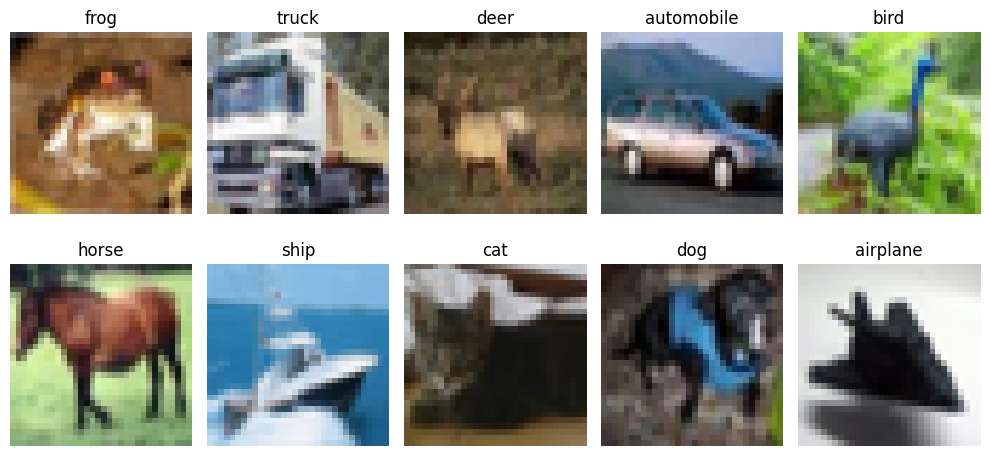

In [3]:
import torchvision.datasets as datasets
from torchvision import transforms
from collections import defaultdict
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
cifar10_train = datasets.CIFAR10(root='./data', train=True, download=True)

# Class names in CIFAR-10
class_names = cifar10_train.classes

# Dictionary to store one image from each class
class_images = defaultdict()

# Iterate through the dataset to collect one image from each class
for image, label in cifar10_train:
    class_name = class_names[label]
    if class_name not in class_images:
        class_images[class_name] = image
    # Stop if we have one image from each class
    if len(class_images) == 10:
        break

# Display the selected images for each class
plt.figure(figsize=(10, 5))
for idx, (class_name, image) in enumerate(class_images.items()):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
class_images[class_names[label]] = image
grey_images = {class_name: image.convert('L') for class_name, image in class_images.items()}


**QUS1**

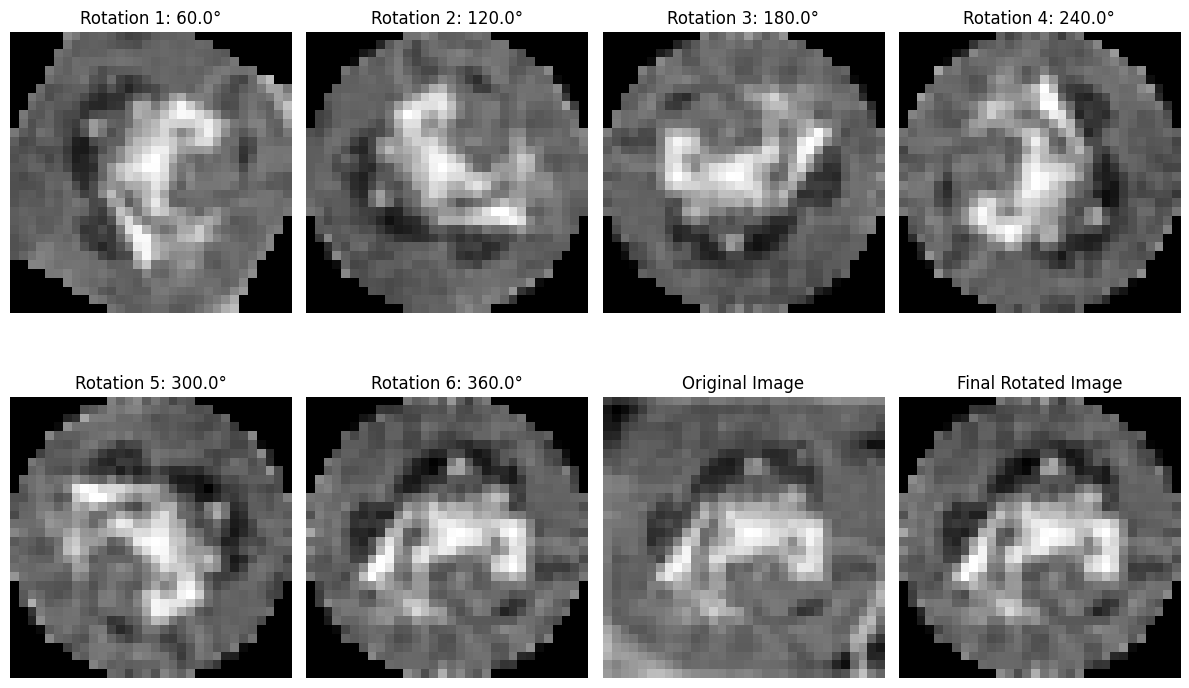

Rotating the image 6 times by 60.0° does NOT restore the original image.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def rotate_image(image, angle):

    # Get the center of the image
    width, height = image.size
    center = (width // 2, height // 2)

    # Rotate the image by the specified angle around the center
    rotated_image = image.rotate(angle, resample=Image.BICUBIC, center=center)

    return rotated_image

def verify_and_show_rotation(image, n):

    theta = 360 / n  # Convert θ from radians to degrees

    # Initialize the rotated image as the original image
    rotated_image = image.copy()

    # Create a plot to display all rotations and comparison
    plt.figure(figsize=(12, 8))

    # Perform rotations and display each intermediate step
    for i in range(n):
        rotated_image = rotate_image(rotated_image, theta)

        # Display the rotated image
        plt.subplot(2, 4, i + 1)
        plt.imshow(rotated_image, cmap='gray')
        plt.title(f'Rotation {i+1}: {theta*(i+1)}°')
        plt.axis('off')

    # Compare the final rotated image with the original
    is_same = np.array_equal(np.array(rotated_image), np.array(image))

    # Show the original and final rotated image side by side
    plt.subplot(2, 4, n + 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 4, n + 2)
    plt.imshow(rotated_image, cmap='gray')
    plt.title('Final Rotated Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return is_same

# Example usage:
n = 6  # Example for 6 rotations
image = grey_images['frog']  # Use any grayscale image, here we use the 'frog' class image

# Verify and show the rotations
is_same = verify_and_show_rotation(image, n)

if is_same:
    print(f"Rotating the image {n} times by {360/n}° restores the original image.")
else:
    print(f"Rotating the image {n} times by {360/n}° does NOT restore the original image.")


**QUS2**

Files already downloaded and verified


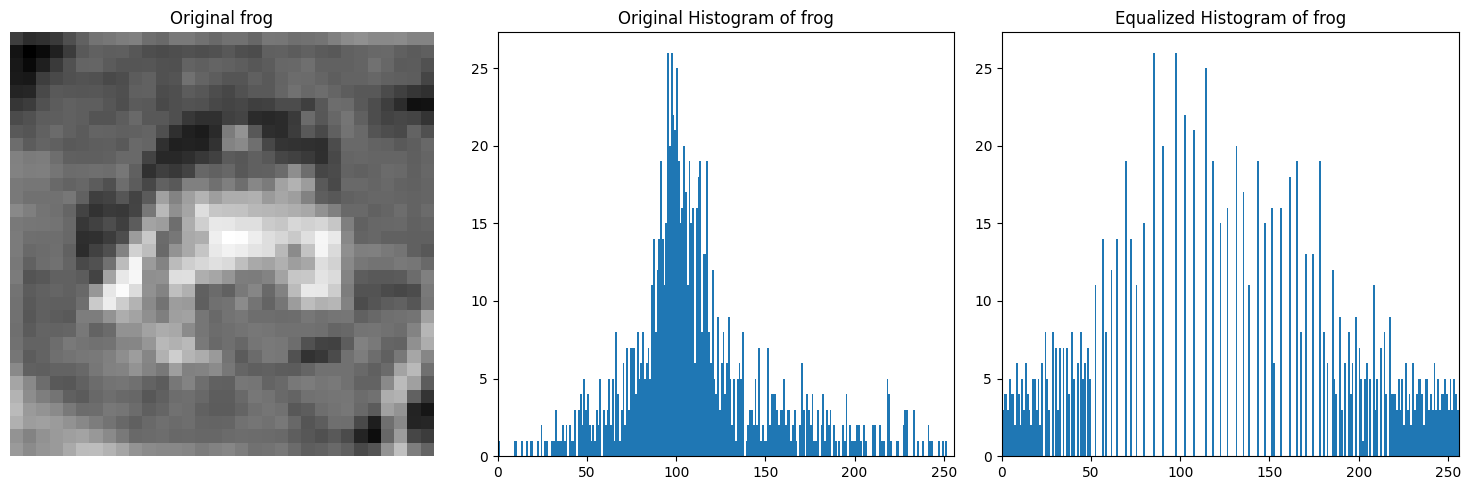

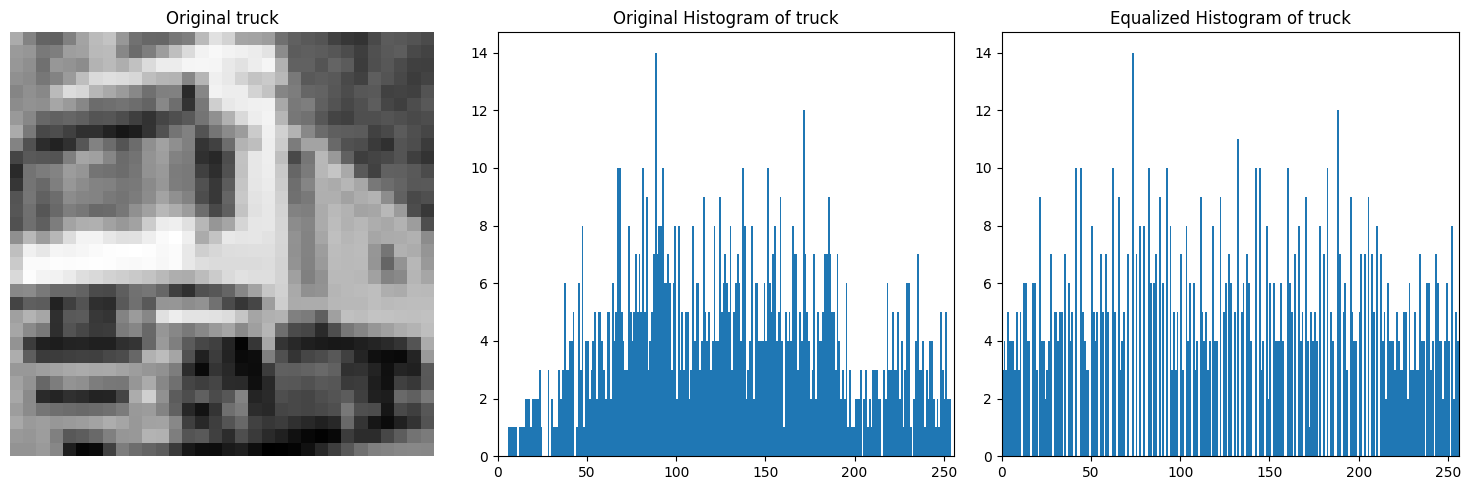

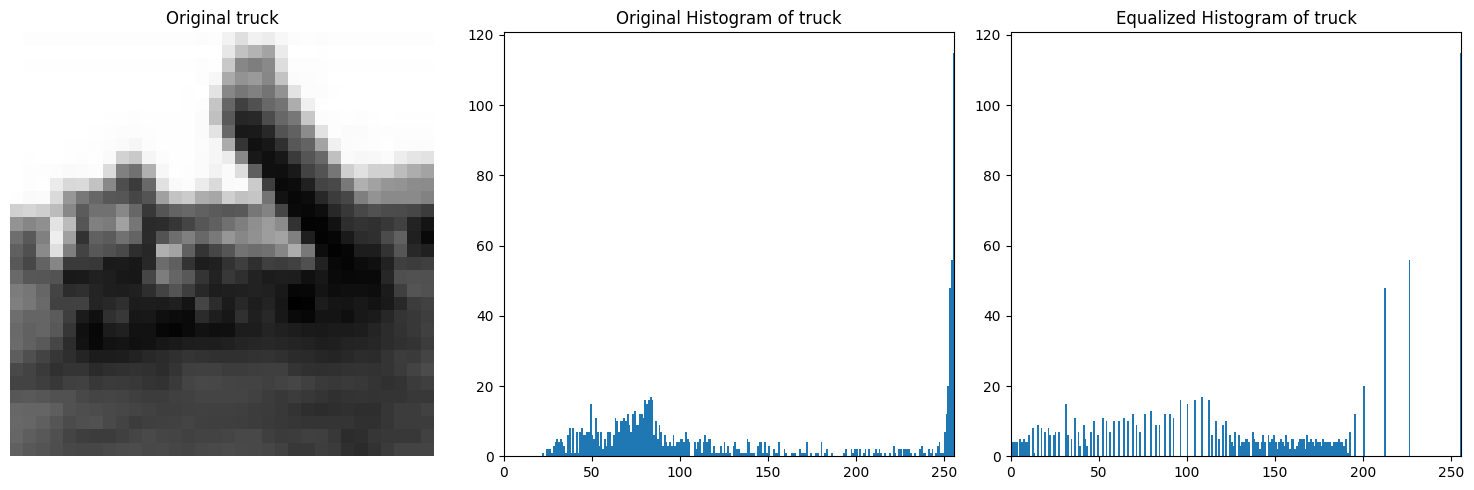

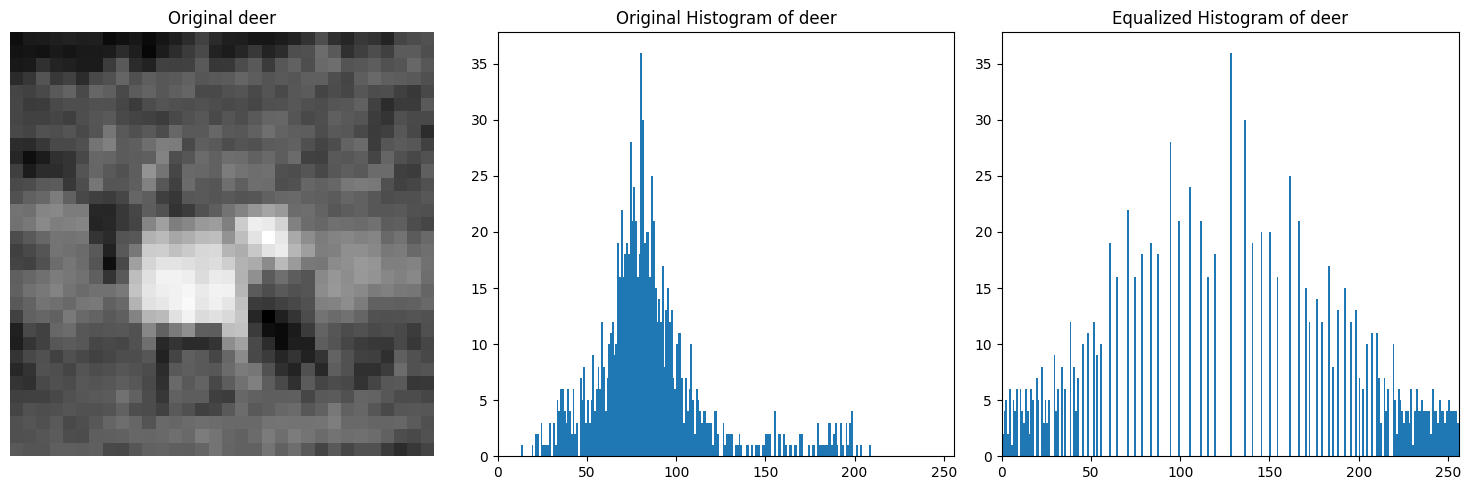

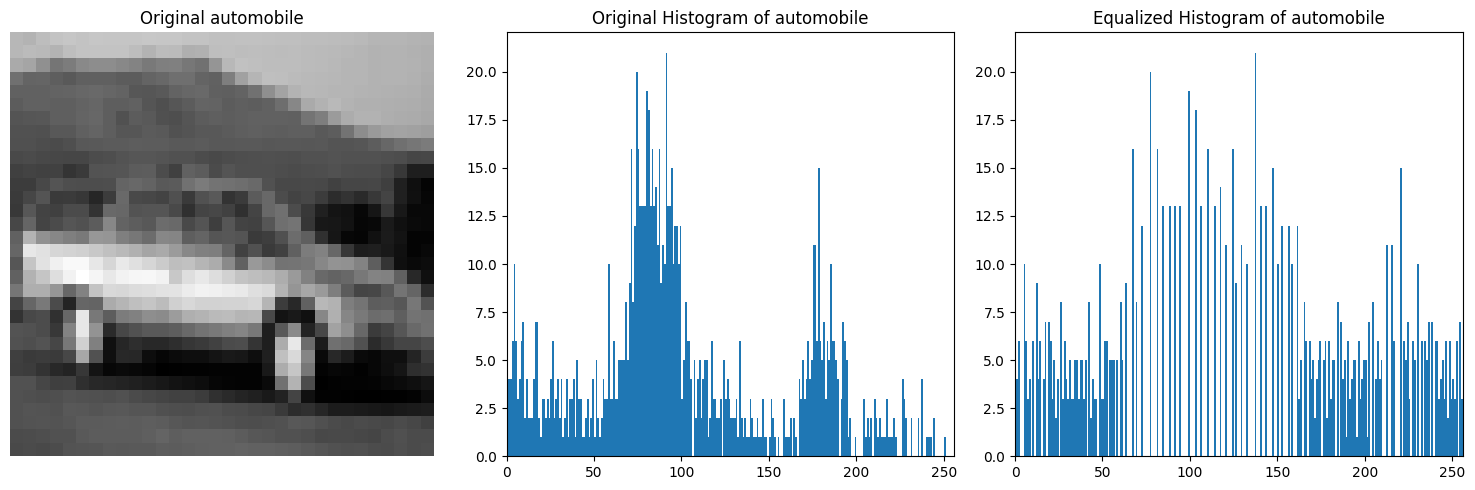

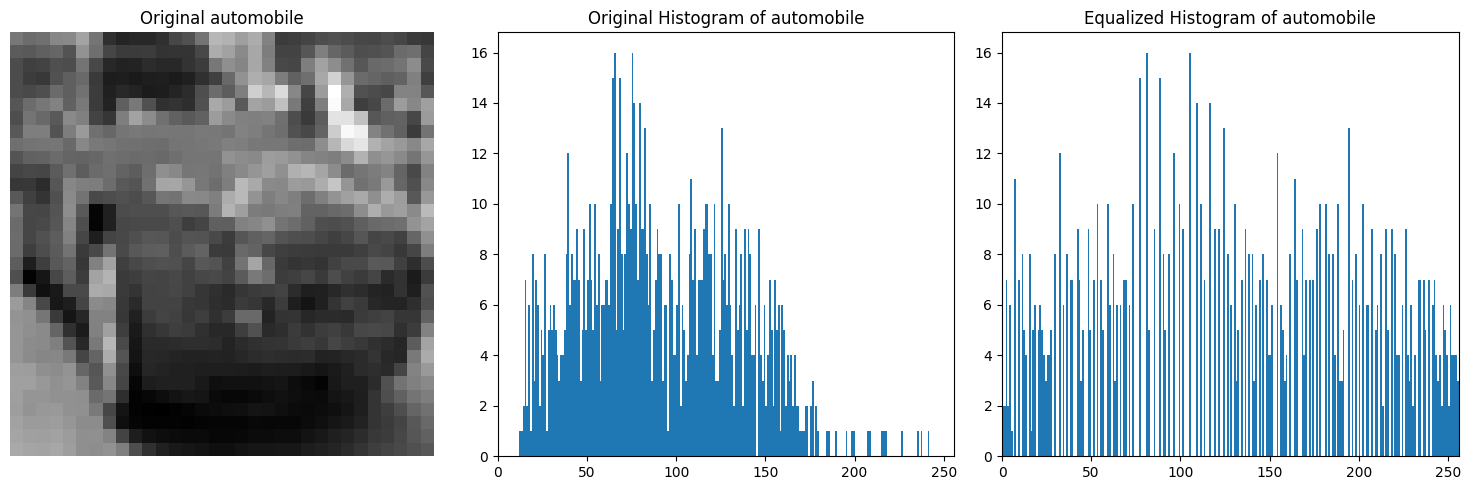

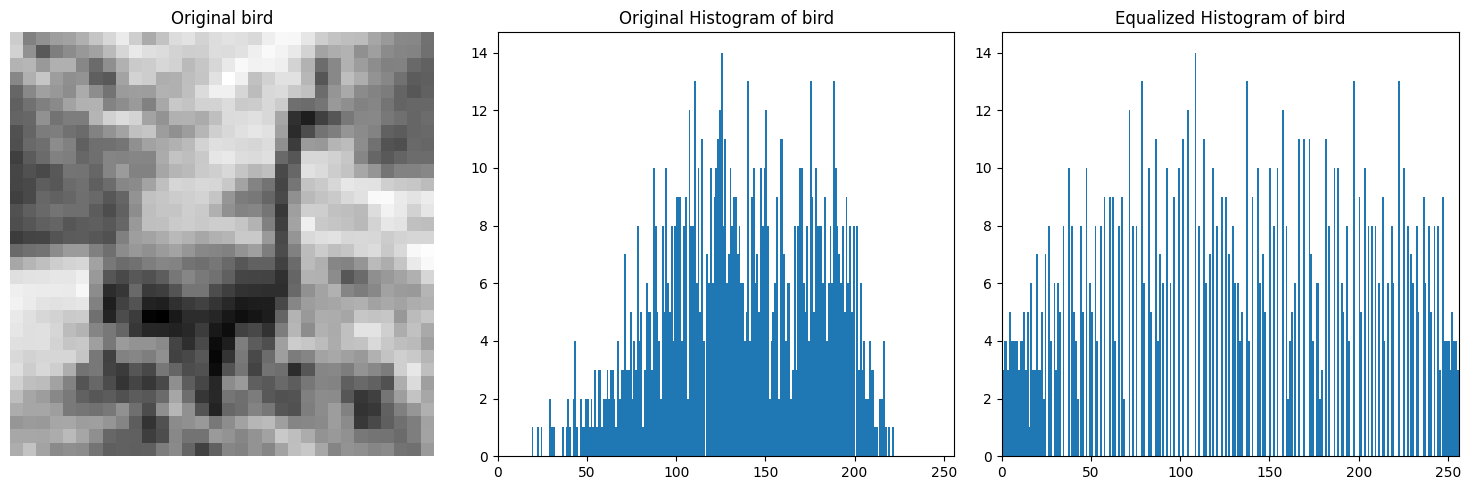

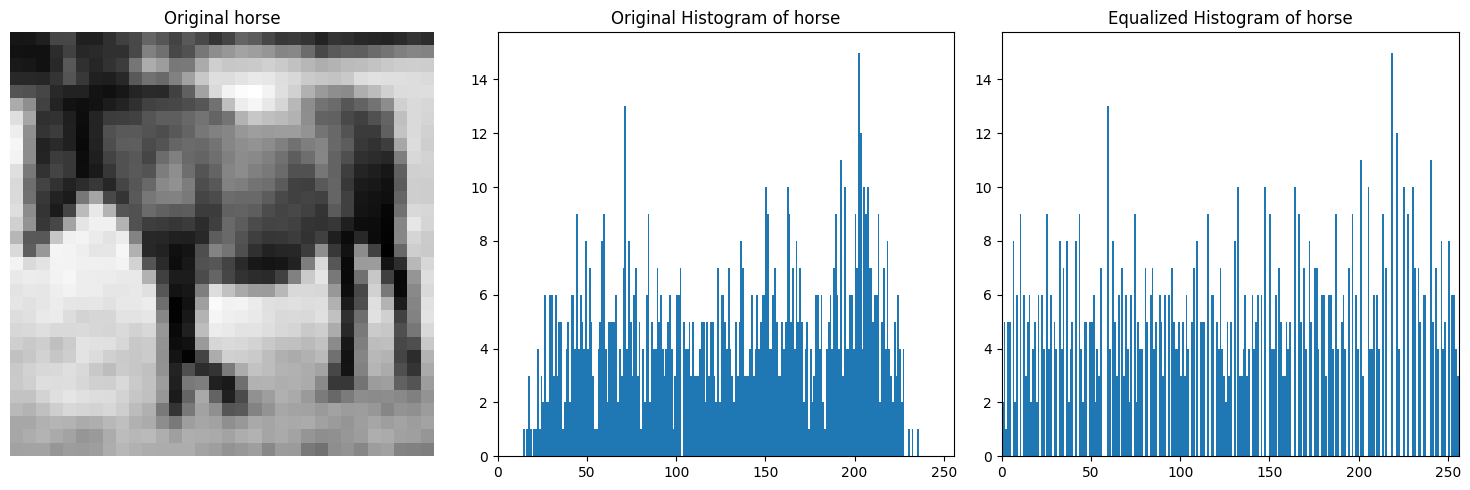

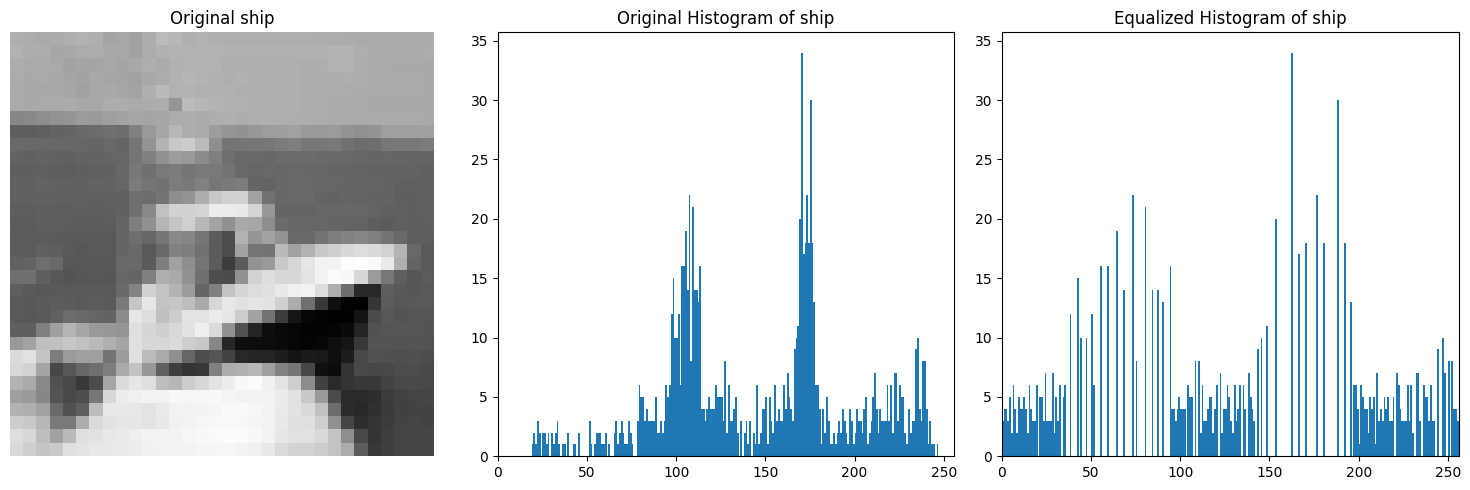

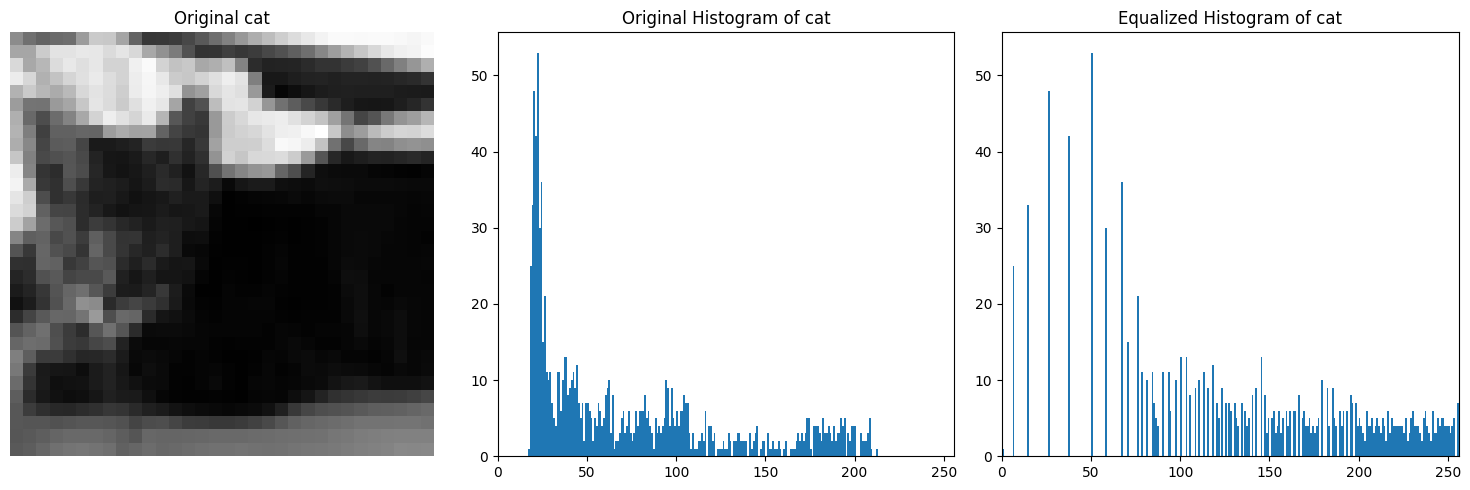

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

# Load CIFAR-10 dataset and convert images to grayscale
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])
cifar10_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

# Class names for CIFAR-10 dataset
cifar10_classes = cifar10_dataset.classes

def plot_histogram(image, ax, title):
    """Function to plot histogram of an image."""
    ax.hist(image.ravel(), bins=256, range=[0, 256])
    ax.set_title(title)
    ax.set_xlim([0, 256])


def show_image(image, ax, title):
    """Function to display an image."""
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')


def process_and_show_images(images, labels):
    """Function to compute histograms and show original image with both histograms."""
    for i, (image, label) in enumerate(zip(images, labels)):
        # Convert tensor to numpy array and scale to 0-255
        image_np = image.numpy().squeeze() * 255
        image_np = image_np.astype(np.uint8)

        # Equalize the histogram of the image
        equalized_image = cv2.equalizeHist(image_np)

        # Create subplots for the original image and histograms
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Plot the original image
        show_image(image_np, axes[0], f"Original {label}")

        # Plot the original image histogram
        plot_histogram(image_np, axes[1], f"Original Histogram of {label}")

        # Plot the equalized histogram only (without displaying the image)
        plot_histogram(equalized_image, axes[2], f"Equalized Histogram of {label}")

        # Display the plots
        plt.tight_layout()
        plt.show()


# Get the first 10 images from CIFAR-10 dataset and process them
cifar10_images = [cifar10_dataset[i][0] for i in range(10)]
cifar10_labels = [cifar10_classes[cifar10_dataset[i][1]] for i in range(10)]

# Process and show images with class labels
process_and_show_images(cifar10_images, cifar10_labels)


**QUS3**

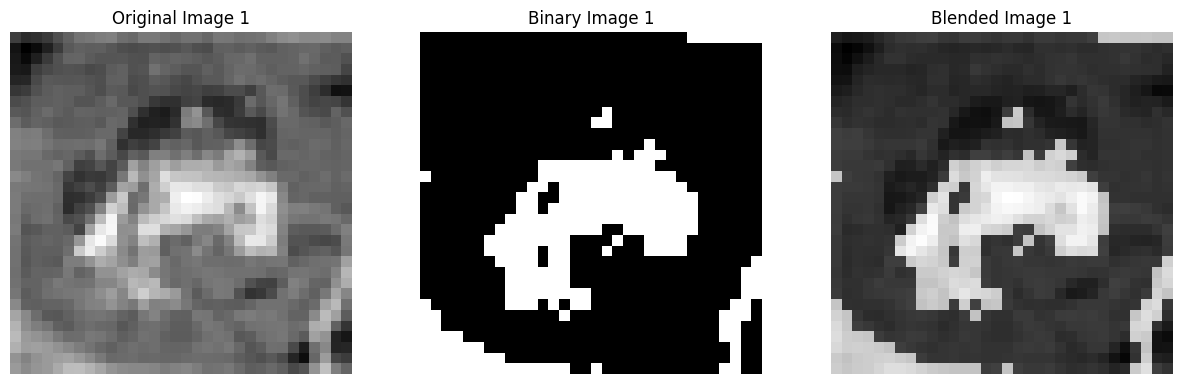

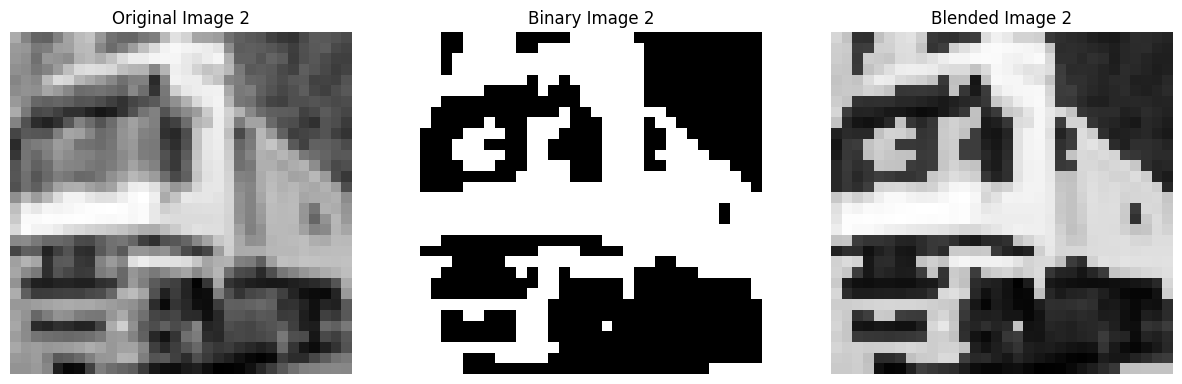

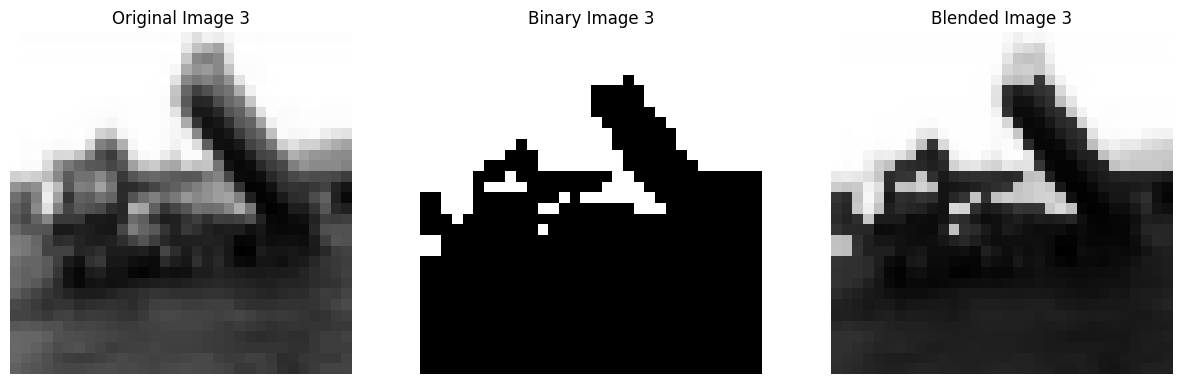

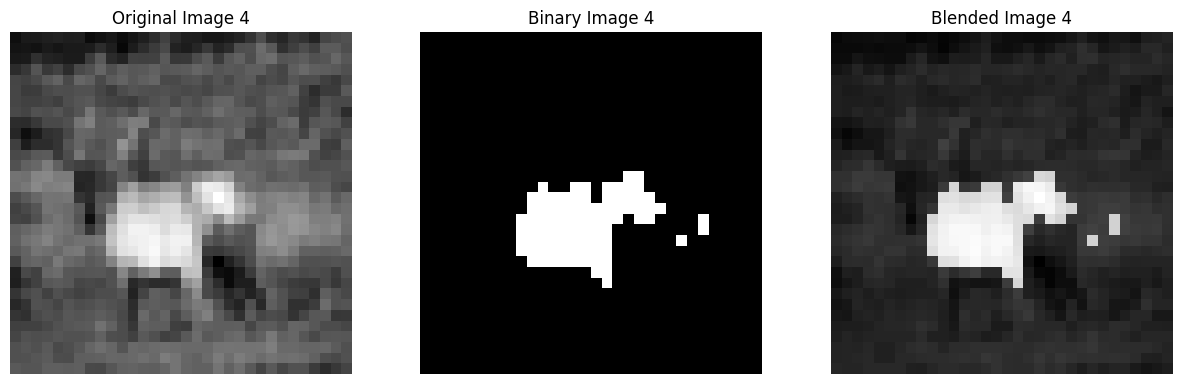

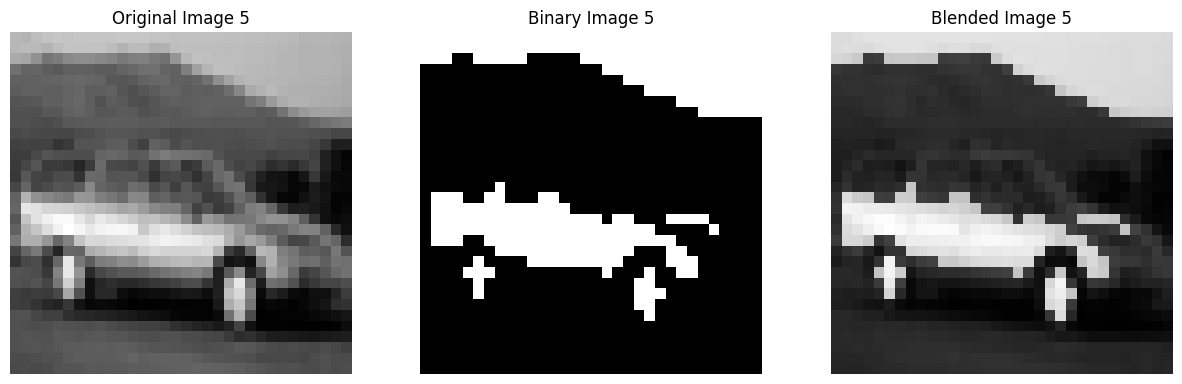

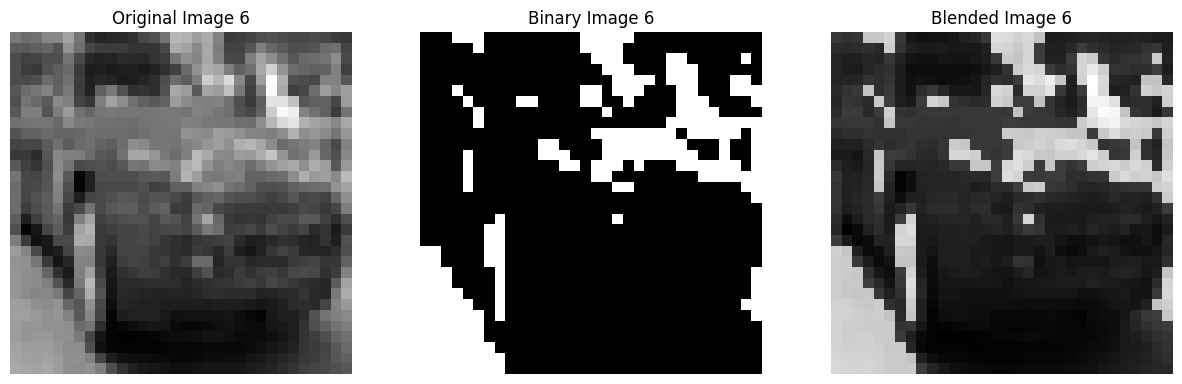

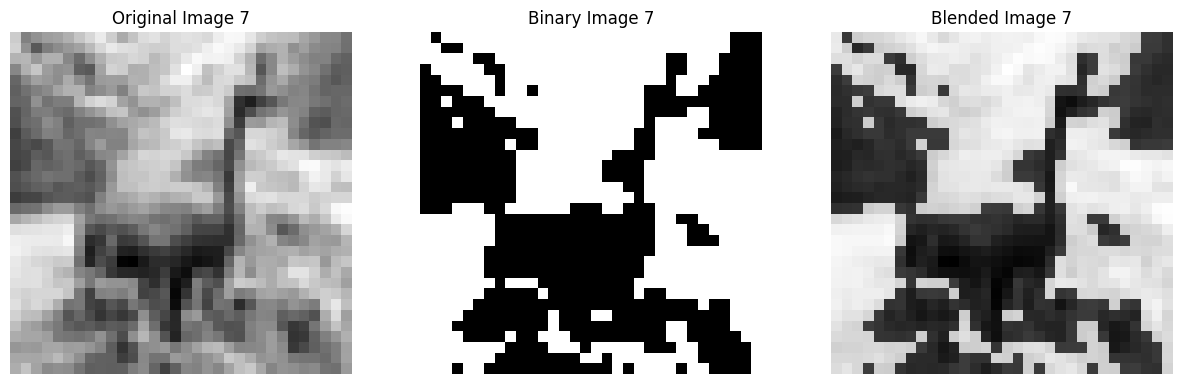

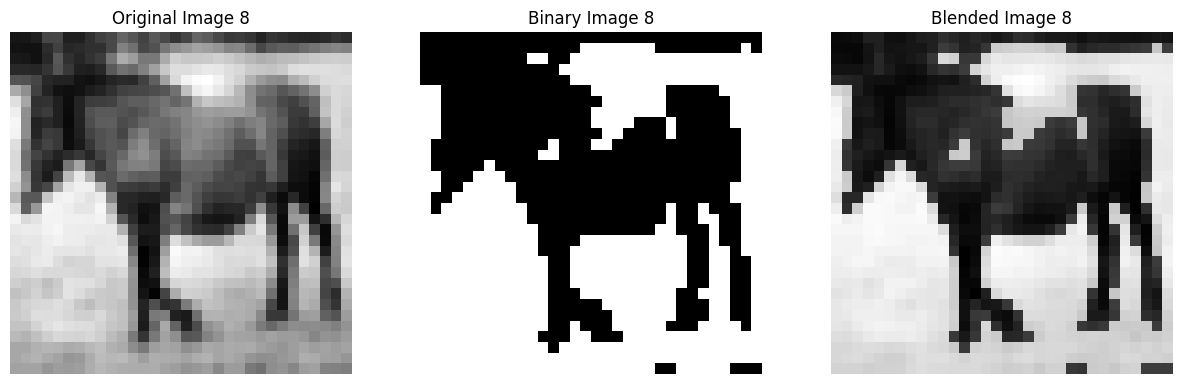

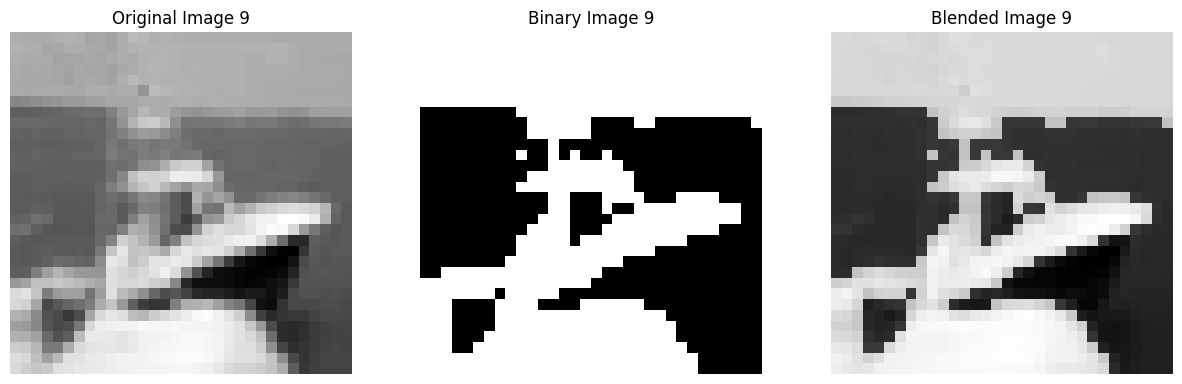

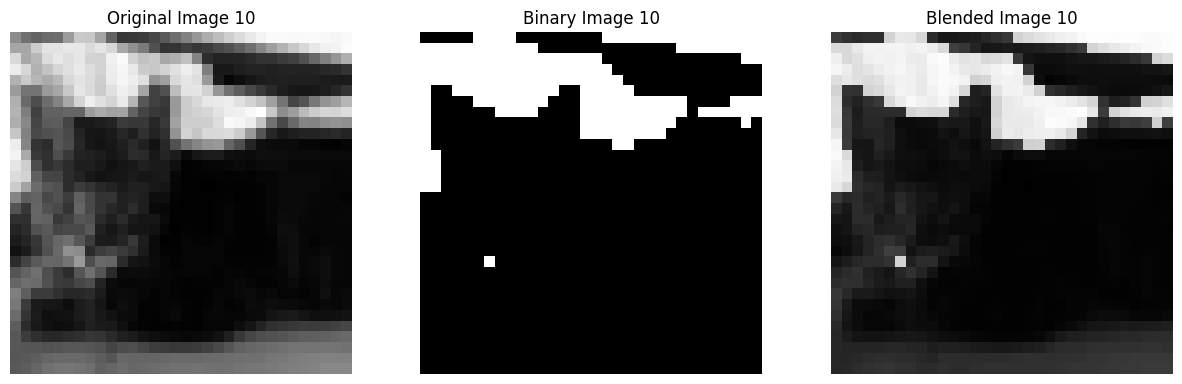

In [6]:
def create_binary_image(image, threshold=128):

    # Convert tensor to numpy array and scale to 0-255
    image_np = image.numpy().squeeze() * 255
    image_np = image_np.astype(np.uint8)

    # Apply threshold to create binary image
    _, binary_image = cv2.threshold(image_np, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

def blend_images(original_image, binary_image, alpha=0.5):

    # Convert tensor to numpy array and scale to 0-255
    original_image_np = original_image.numpy().squeeze() * 255
    original_image_np = original_image_np.astype(np.uint8)

    # Blend the images using the formula: blended_image = (alpha * original) + ((1 - alpha) * binary)
    blended_image = cv2.addWeighted(original_image_np, alpha, binary_image, 1 - alpha, 0)
    return blended_image

def plot_images(original_image, binary_image, blended_image, image_id):

    # Convert original tensor to numpy array and scale to 0-255
    original_image_np = original_image.numpy().squeeze() * 255
    original_image_np = original_image_np.astype(np.uint8)

    plt.figure(figsize=(15, 5))

    # Plot original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_image_np, cmap='gray')
    plt.title(f'Original Image {image_id}')
    plt.axis('off')

    # Plot binary image
    plt.subplot(1, 3, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Binary Image {image_id}')
    plt.axis('off')

    # Plot blended image
    plt.subplot(1, 3, 3)
    plt.imshow(blended_image, cmap='gray')
    plt.title(f'Blended Image {image_id}')
    plt.axis('off')

    plt.show()

# Apply the thresholding, binary creation, and blending for the first 10 images from CIFAR-10
for i in range(10):
    image, _ = cifar10_dataset[i]

    # Create binary image based on threshold
    binary_image = create_binary_image(image, threshold=128)

    # Blend the binary image with the original image
    blended_image = blend_images(image, binary_image, alpha=0.5)

    # Display the original, binary, and blended images
    plot_images(image, binary_image, blended_image, i+1)


**qus4**

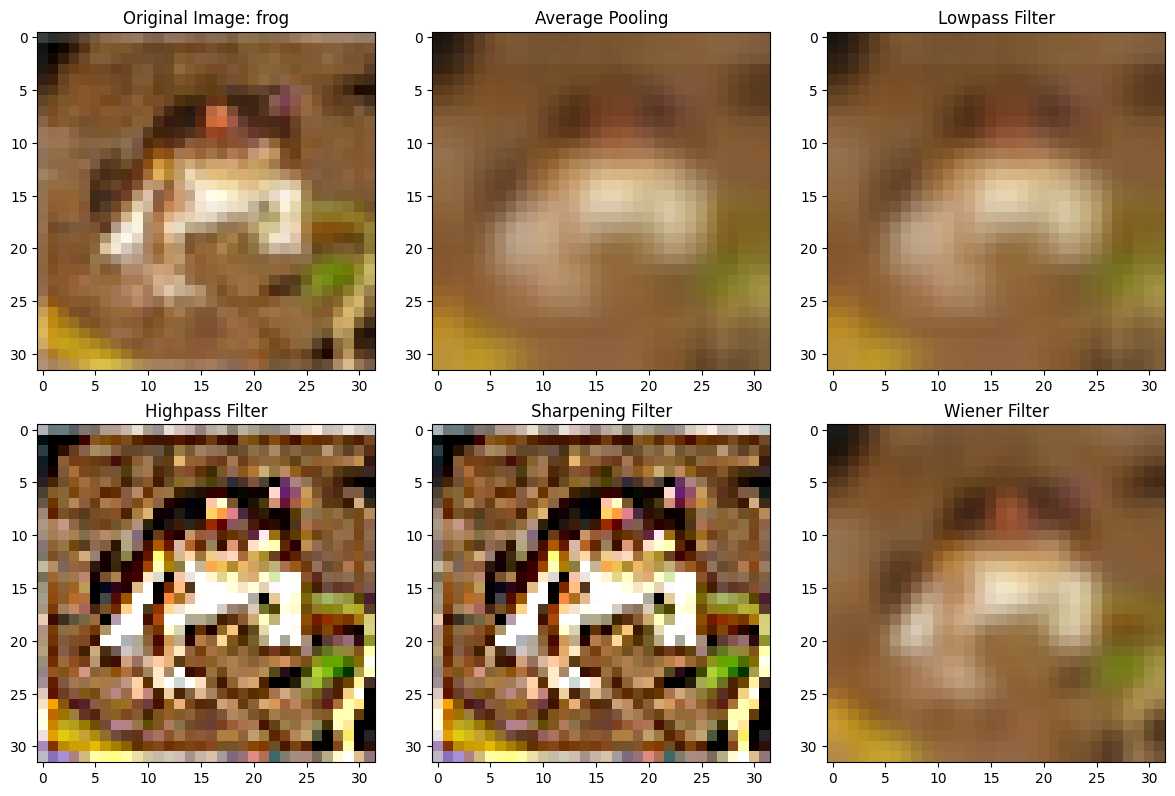

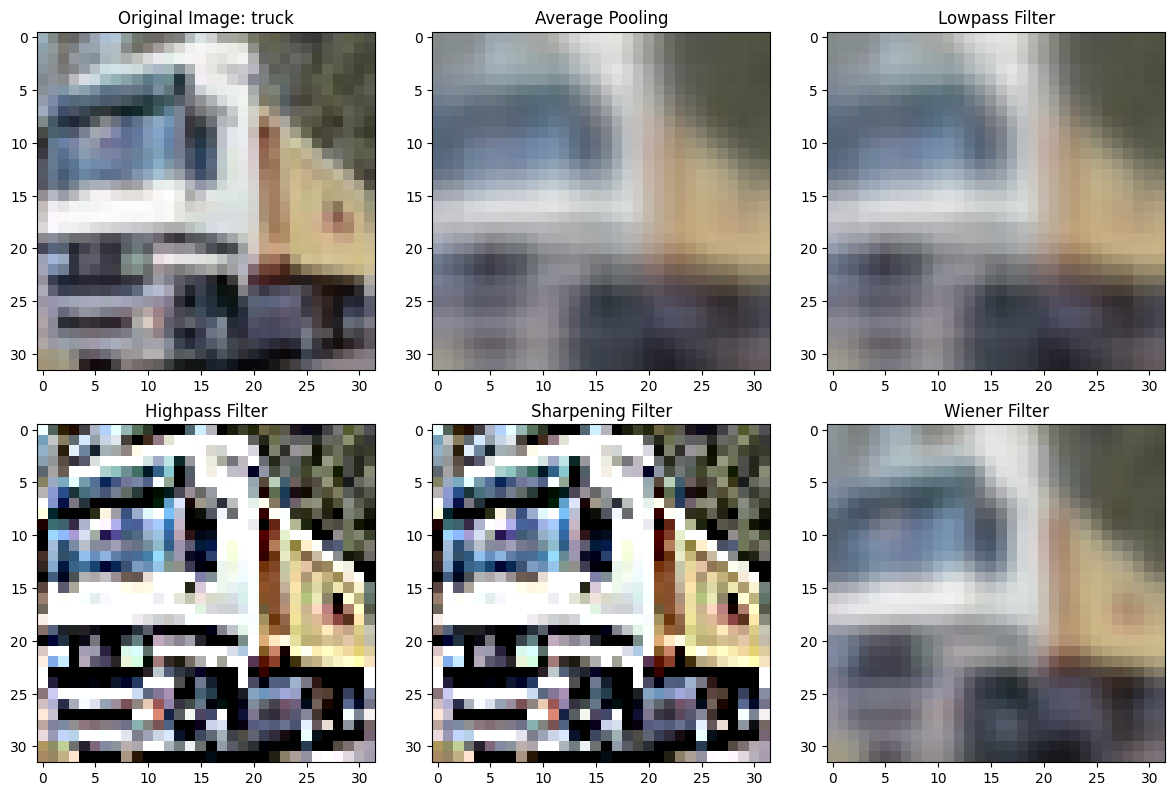

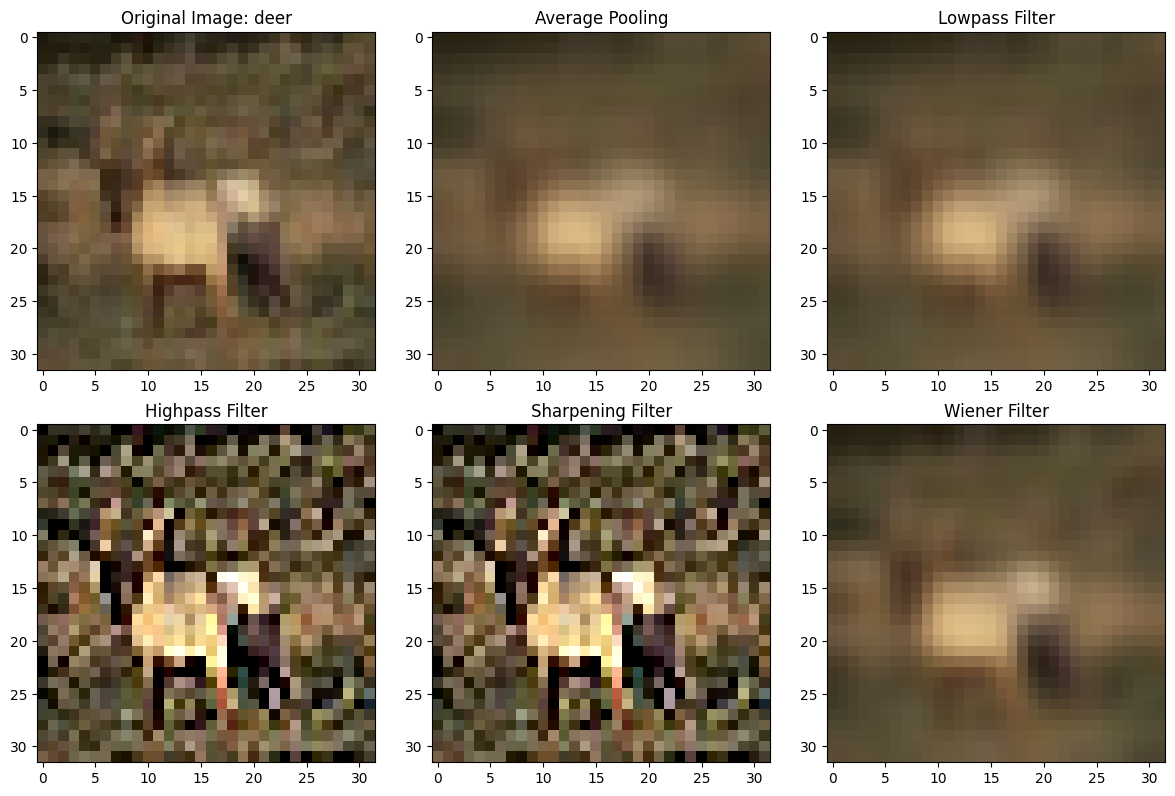

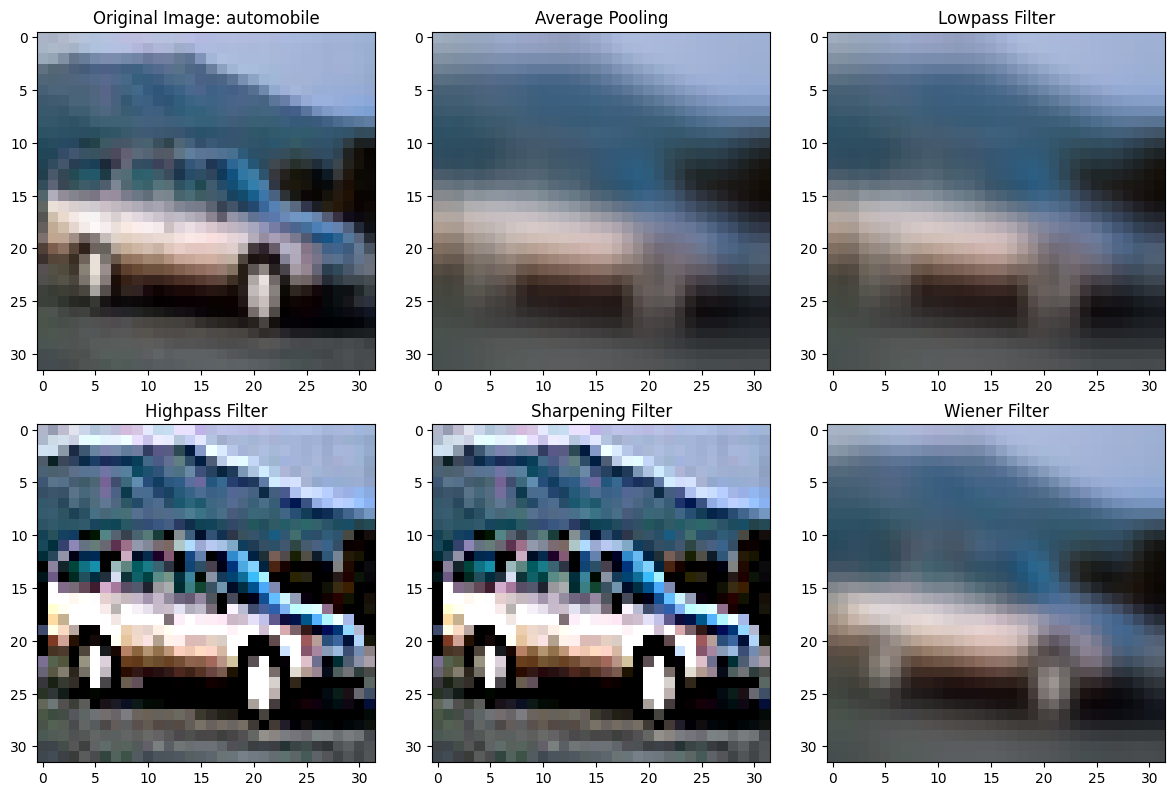

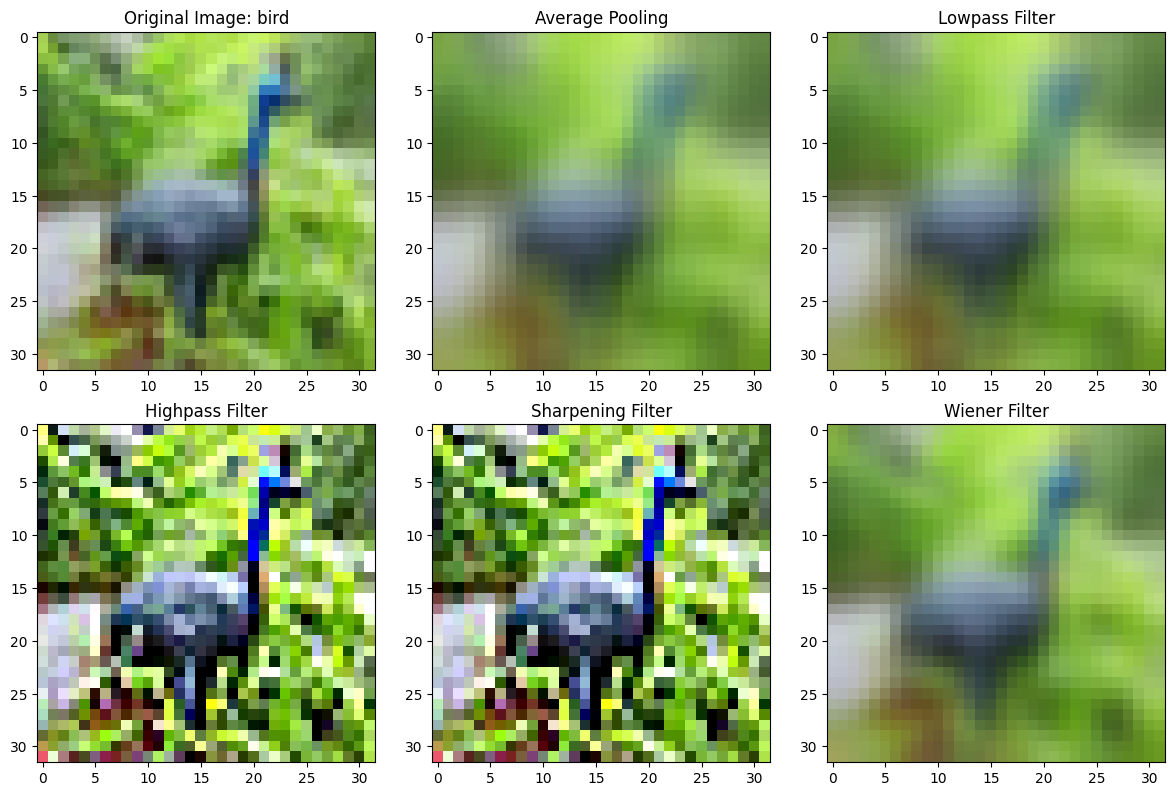

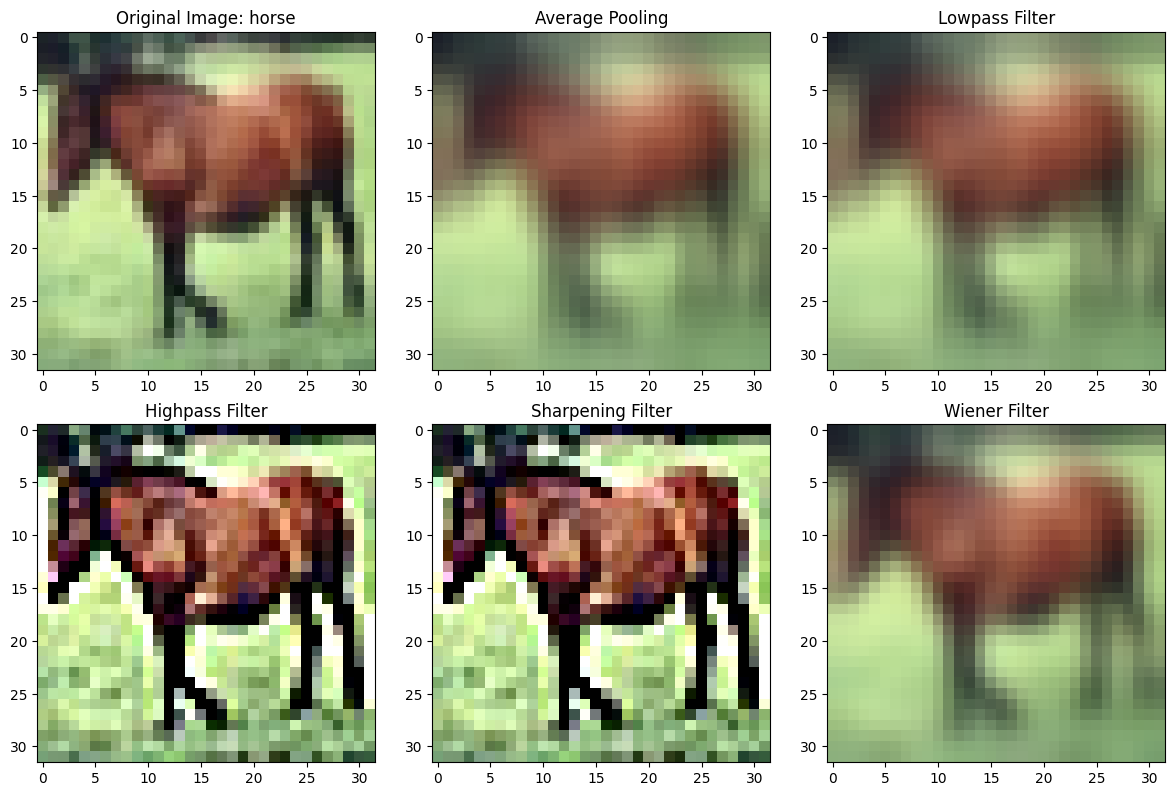

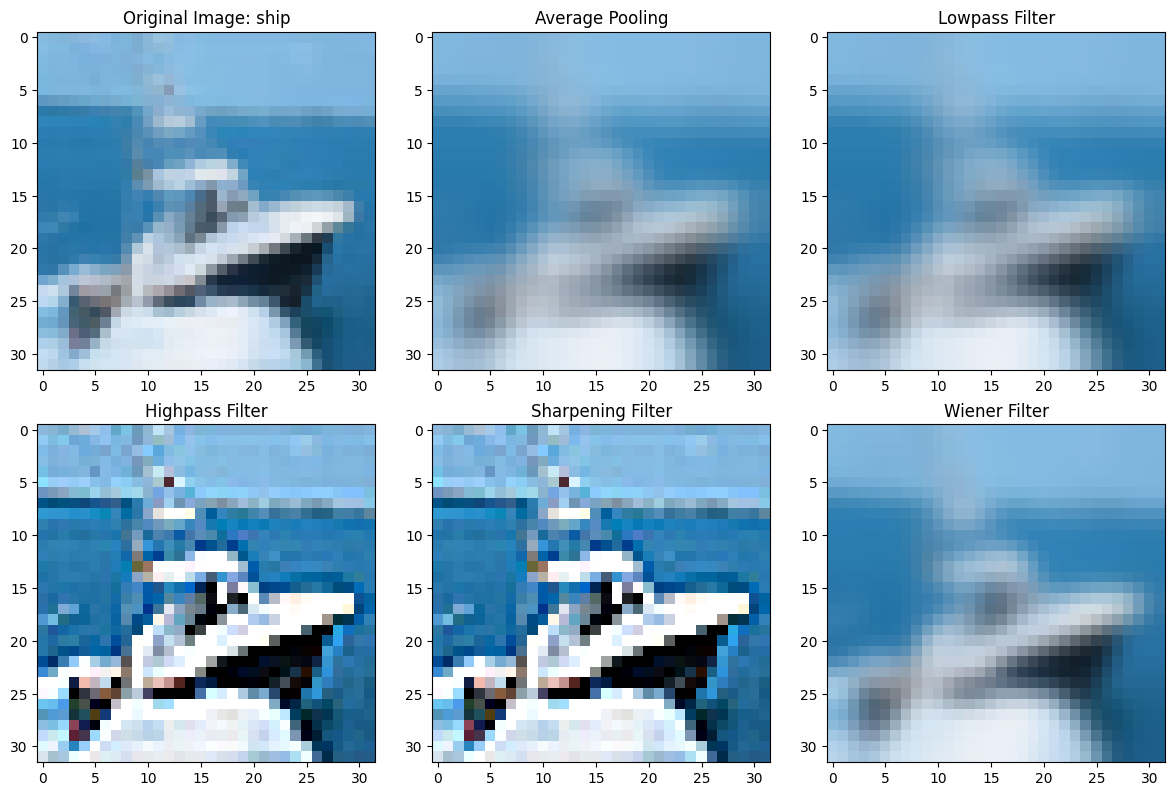

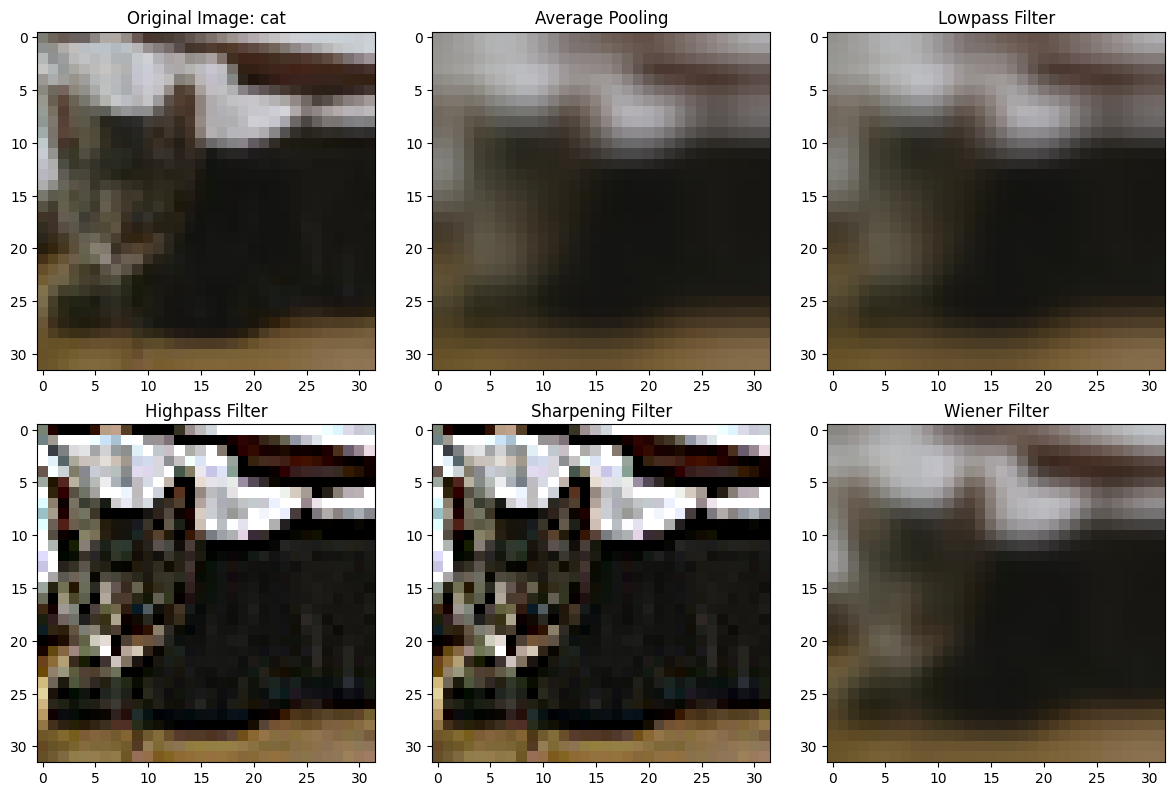

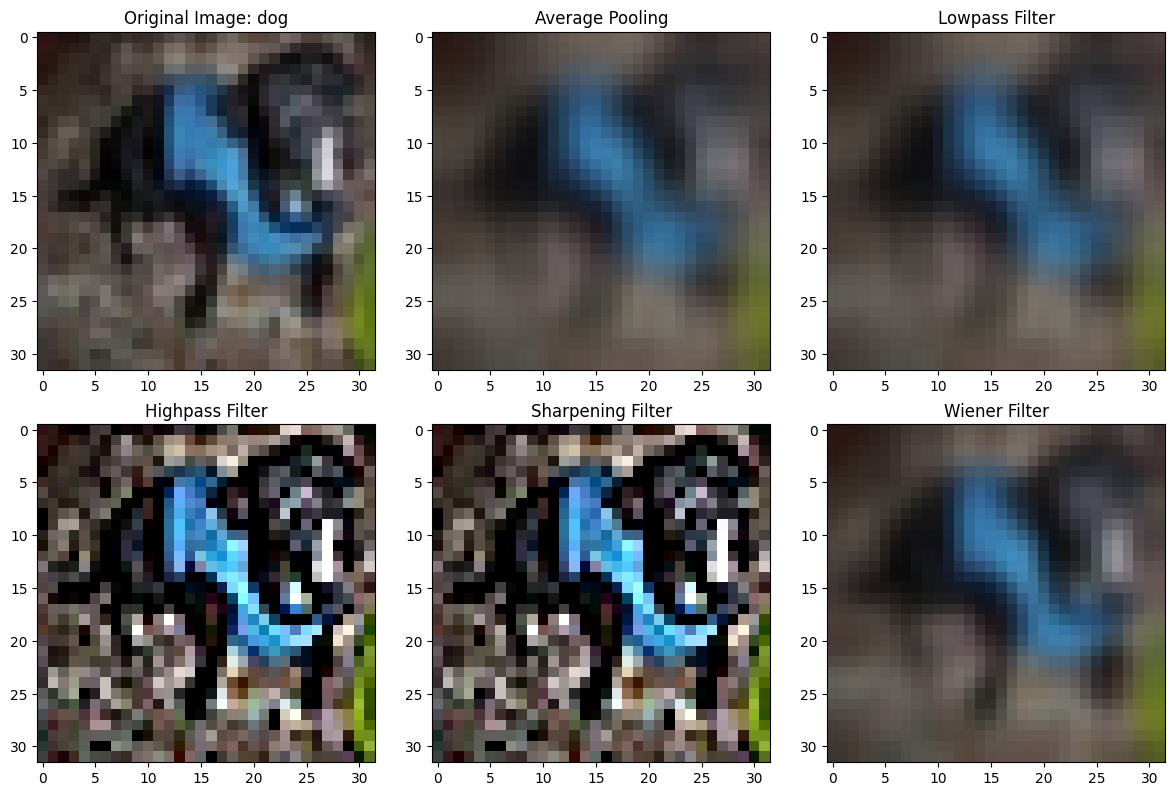

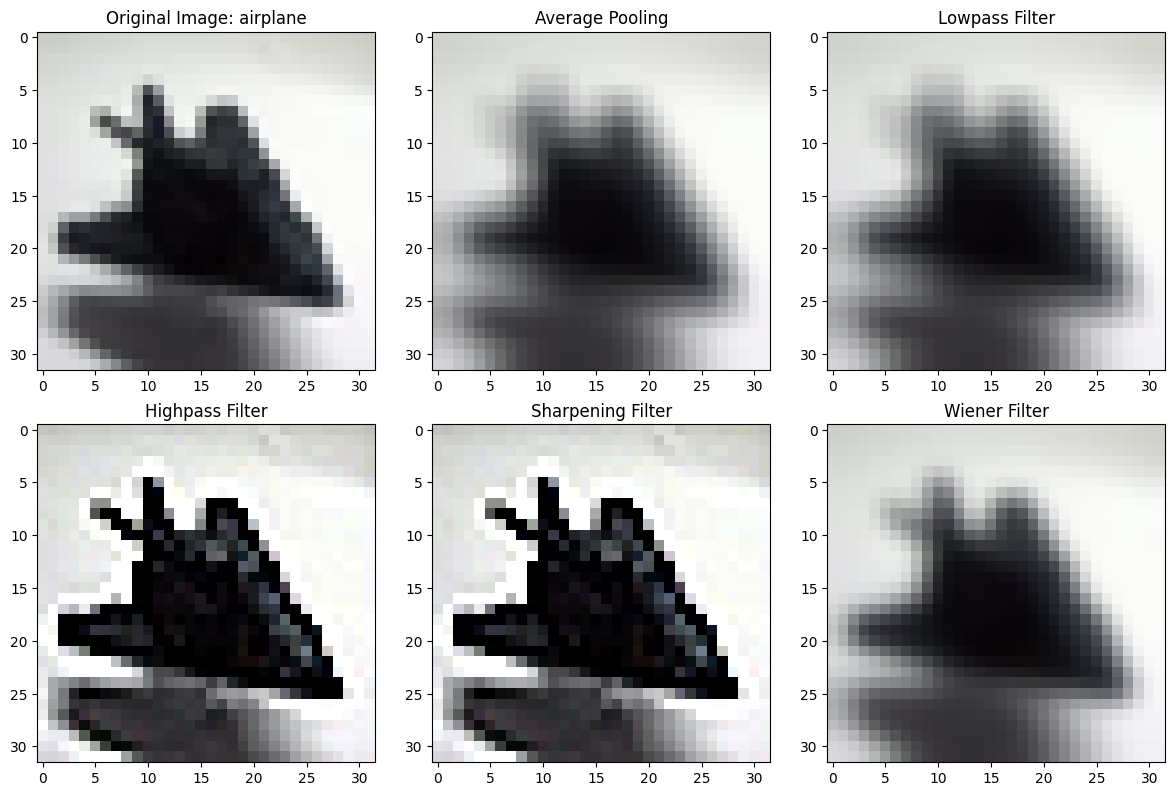

In [9]:
class ImageFilters:
    def __init__(self, images_dict):
        self.images_dict = images_dict

    def apply_filters(self):
        """Apply various filters to the images in the dictionary."""
        for name, image_pil in self.images_dict.items():
            # Convert the PIL image to a NumPy array
            image_np = np.array(image_pil)

            # Apply filters
            avg_pool_image = self.average_pool(image_np, 5)
            lowpass_image = self.lowpass_filter(image_np, 5)
            highpass_image = self.highpass_filter(image_np)
            sharpened_image = self.sharpening_filter(image_np)

            # Example Wiener Filter (simple version)
            wiener_kernel = np.array([[1, 4, 6, 4, 1],
                                       [4, 16, 24, 16, 4],
                                       [6, 24, 36, 24, 6],
                                       [4, 16, 24, 16, 4],
                                       [1, 4, 6, 4, 1]]) / 256
            wiener_filtered_image = self.wiener_filter(image_np, wiener_kernel)

            # Display results
            self.display_results(image_np, avg_pool_image, lowpass_image,
                                 highpass_image, sharpened_image,
                                 wiener_filtered_image, name)

    def average_pool(self, image, kernel_size):
        kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
        pooled_image = cv2.filter2D(image, -1, kernel)
        return pooled_image

    def lowpass_filter(self, image, kernel_size):
        kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
        filtered_image = cv2.filter2D(image, -1, kernel)
        return filtered_image

    def highpass_filter(self, image):
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])  # Simple highpass filter kernel
        filtered_image = cv2.filter2D(image, -1, kernel)
        return filtered_image

    def sharpening_filter(self, image):
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])  # Standard sharpening kernel
        sharpened_image = cv2.filter2D(image, -1, kernel)
        return sharpened_image

    def wiener_filter(self, image, kernel):
        kernel = np.flipud(np.fliplr(kernel))  # Flip kernel for convolution
        estimated_image = cv2.filter2D(image, -1, kernel)
        return estimated_image  # This is a simplified version; additional implementation is needed for full Wiener filtering

    def display_results(self, original, avg_pool, lowpass, highpass, sharpened, wiener, name):
        """Display the original image and the results of the filters."""
        plt.figure(figsize=(12, 8))
        plt.subplot(231), plt.imshow(original, cmap='gray'), plt.title(f'Original Image: {name}')
        plt.subplot(232), plt.imshow(avg_pool, cmap='gray'), plt.title('Average Pooling')
        plt.subplot(233), plt.imshow(lowpass, cmap='gray'), plt.title('Lowpass Filter')
        plt.subplot(234), plt.imshow(highpass, cmap='gray'), plt.title('Highpass Filter')
        plt.subplot(235), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpening Filter')
        plt.subplot(236), plt.imshow(wiener, cmap='gray'), plt.title('Wiener Filter')
        plt.tight_layout()
        plt.show()

# Create an instance of the ImageFilters class and apply filters
image_filter = ImageFilters(class_images)
image_filter.apply_filters()

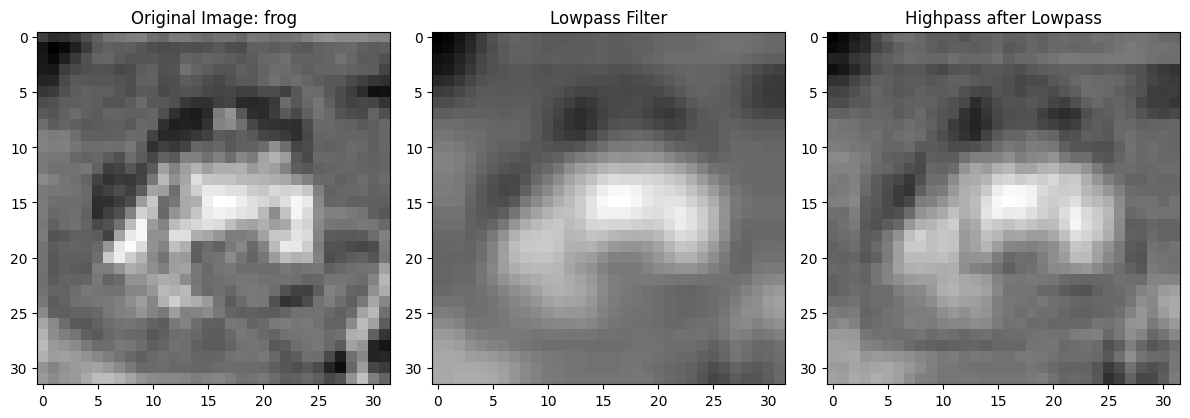

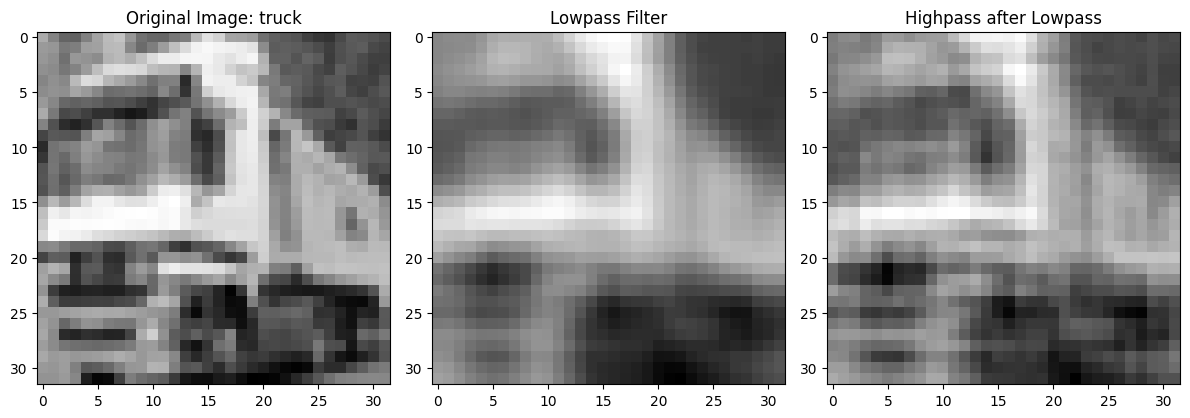

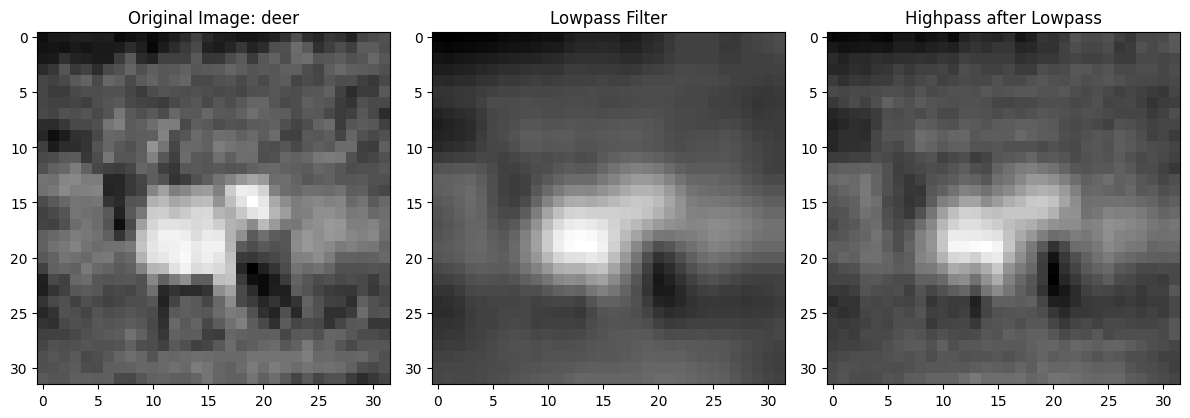

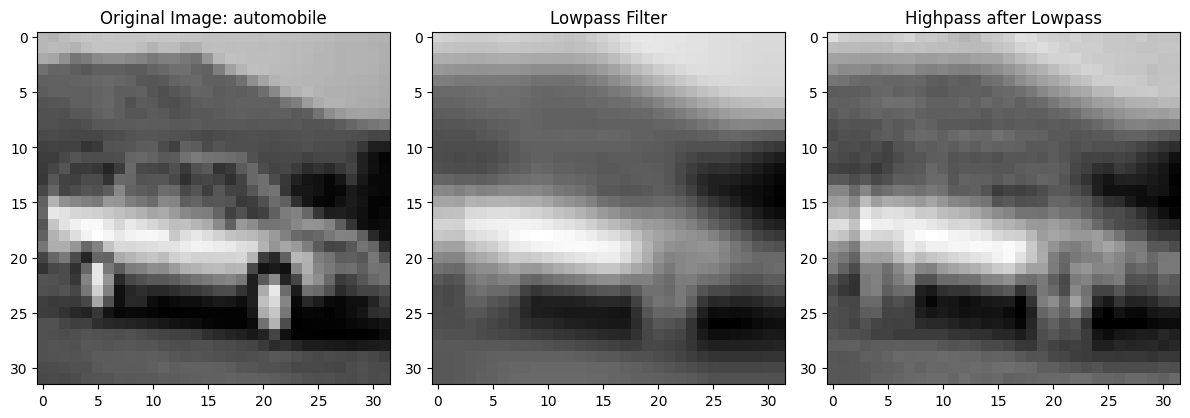

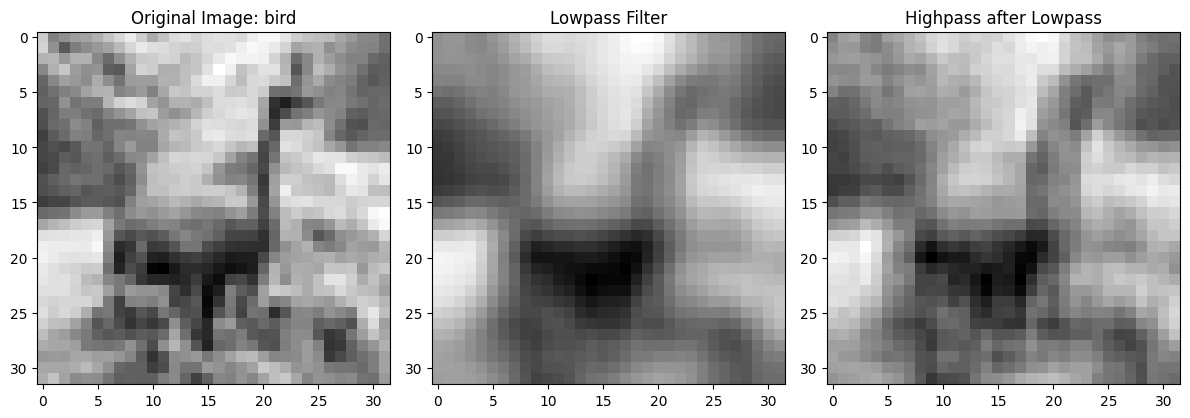

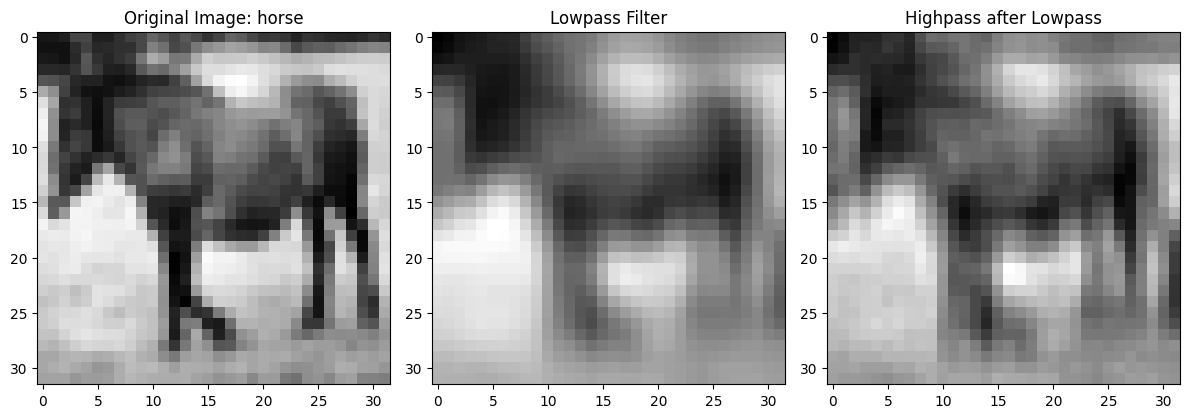

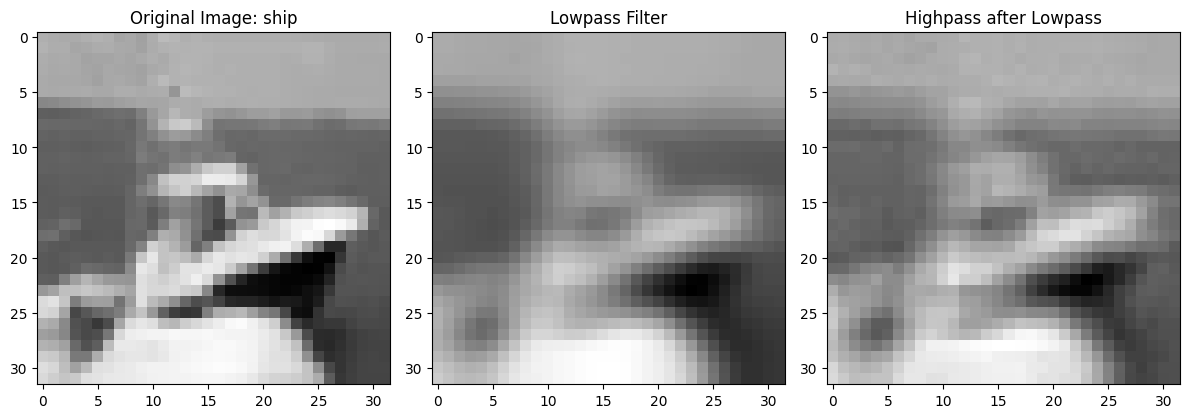

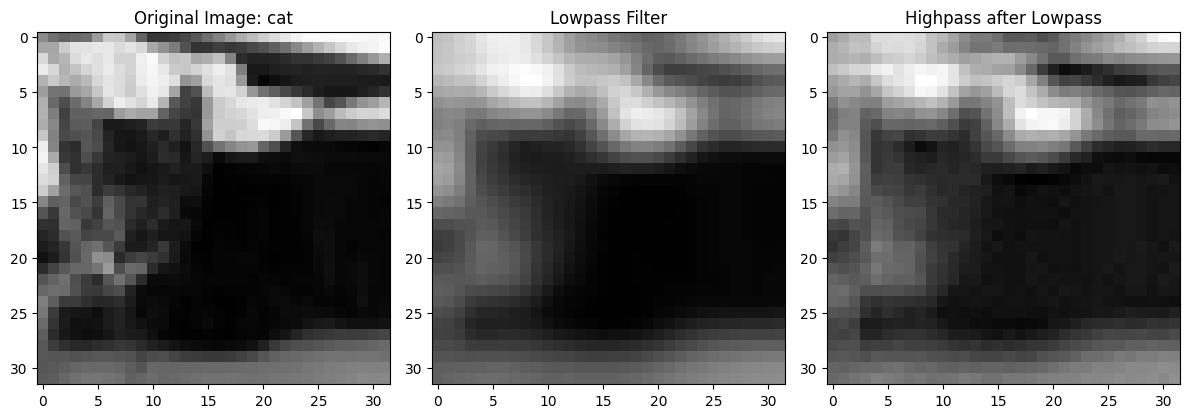

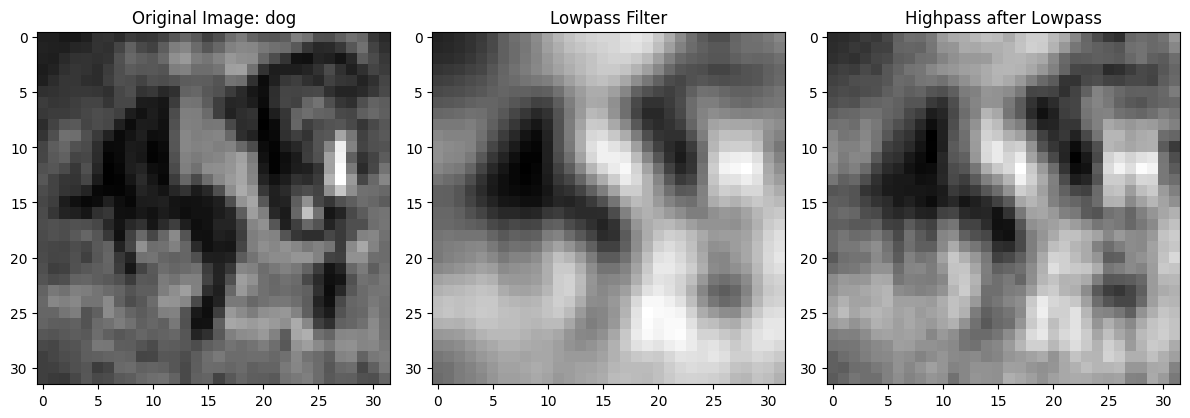

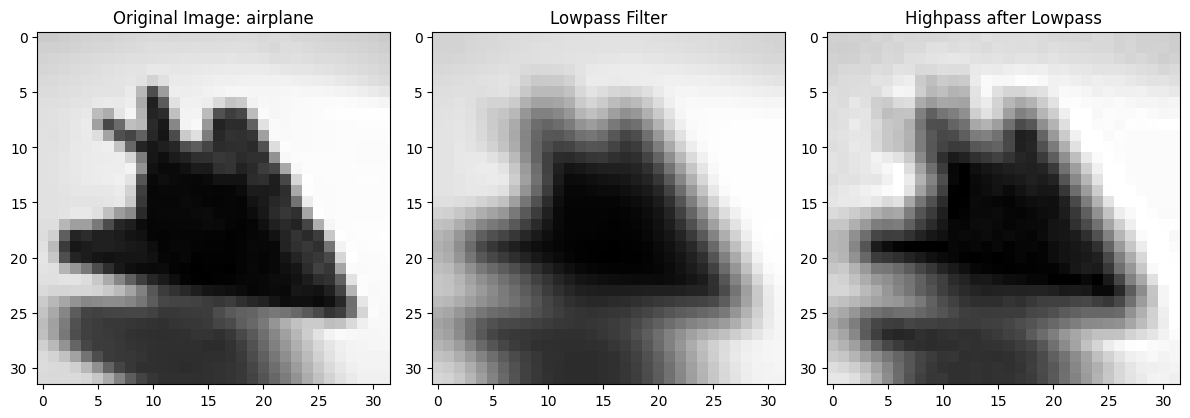

In [15]:

import matplotlib.pyplot as plt
import numpy as np
class ImageFilters:
    def __init__(self, images_dict):
        self.images_dict = images_dict

    def apply_filters(self):
        """Apply various filters to the images in the dictionary."""
        for name, image_pil in self.images_dict.items():
            # Convert the PIL image to a NumPy array
            image_np = np.array(image_pil)

            # Apply lowpass filter
            lowpass_image = self.lowpass_filter(image_np, 5)

            # Apply highpass filter to the result of lowpass filter
            highpass_after_lowpass_image = self.highpass_filter(lowpass_image)

            # Display results
            self.display_results(image_np, lowpass_image, highpass_after_lowpass_image, name)

    def lowpass_filter(self, image, kernel_size):
        kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
        filtered_image = cv2.filter2D(image, -1, kernel)
        return filtered_image

    def highpass_filter(self, image):
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])  # Simple highpass filter kernel
        filtered_image = cv2.filter2D(image, -1, kernel)
        return filtered_image

    def display_results(self, original, lowpass, highpass_after_lowpass, name):
        """Display the original image and the results of the filters."""
        plt.figure(figsize=(12, 8))
        plt.subplot(131), plt.imshow(original, cmap='gray'), plt.title(f'Original Image: {name}')
        plt.subplot(132), plt.imshow(lowpass, cmap='gray'), plt.title('Lowpass Filter')
        plt.subplot(133), plt.imshow(highpass_after_lowpass, cmap='gray'), plt.title('Highpass after Lowpass')
        plt.tight_layout()
        plt.show()

# Create an instance of the ImageFilters class and apply filters
image_filter = ImageFilters(grey_images)
image_filter.apply_filters()


**QUS5**

In [10]:
def calculate_dft_and_idft(images_dict):
    """Calculate the 2D Discrete Fourier Transform, inverse DFT, and display results."""
    for name, image_pil in images_dict.items():
        # Convert the PIL image to a NumPy array
        original_image_np = np.array(image_pil).astype(np.float32)

        # Calculate the 2D Discrete Fourier Transform
        dft = np.fft.fft2(original_image_np)

        # Shift the zero frequency component to the center
        dft_shifted = np.fft.fftshift(dft)

        # Calculate the magnitude spectrum
        magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)  # Log scale for visibility

        # Calculate the inverse DFT
        idft_shifted = np.fft.ifftshift(dft_shifted)  # Shift back
        reconstructed_image_np = np.fft.ifft2(idft_shifted).real  # Inverse DFT

        # Scale the reconstructed image to the original range (0-255)
        reconstructed_image_np = np.clip(reconstructed_image_np, 0, 255).astype(np.uint8)

        # Calculate the error between the original and reconstructed image
        error_image = np.abs(original_image_np - reconstructed_image_np)

        # Calculate Mean Squared Error
        mse_value = np.mean((original_image_np - reconstructed_image_np) ** 2)

        # Display results
        display_results(original_image_np, magnitude_spectrum, reconstructed_image_np, mse_value, name)

def display_results(original, magnitude_spectrum, reconstructed, mse, name):
    """Display the original image, DFT magnitude spectrum, reconstructed image, error image, and MSE."""
    plt.figure(figsize=(24, 6))

    plt.subplot(141), plt.imshow(original, cmap='gray'), plt.title(f'Original Image: {name}')
    plt.subplot(142), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('DFT Magnitude Spectrum')
    plt.subplot(143), plt.imshow(reconstructed, cmap='gray'), plt.title('Reconstructed Image')


    plt.suptitle(f'Mean Squared Error (MSE): {mse:.2f}', fontsize=16)
    plt.tight_layout()
    plt.show()



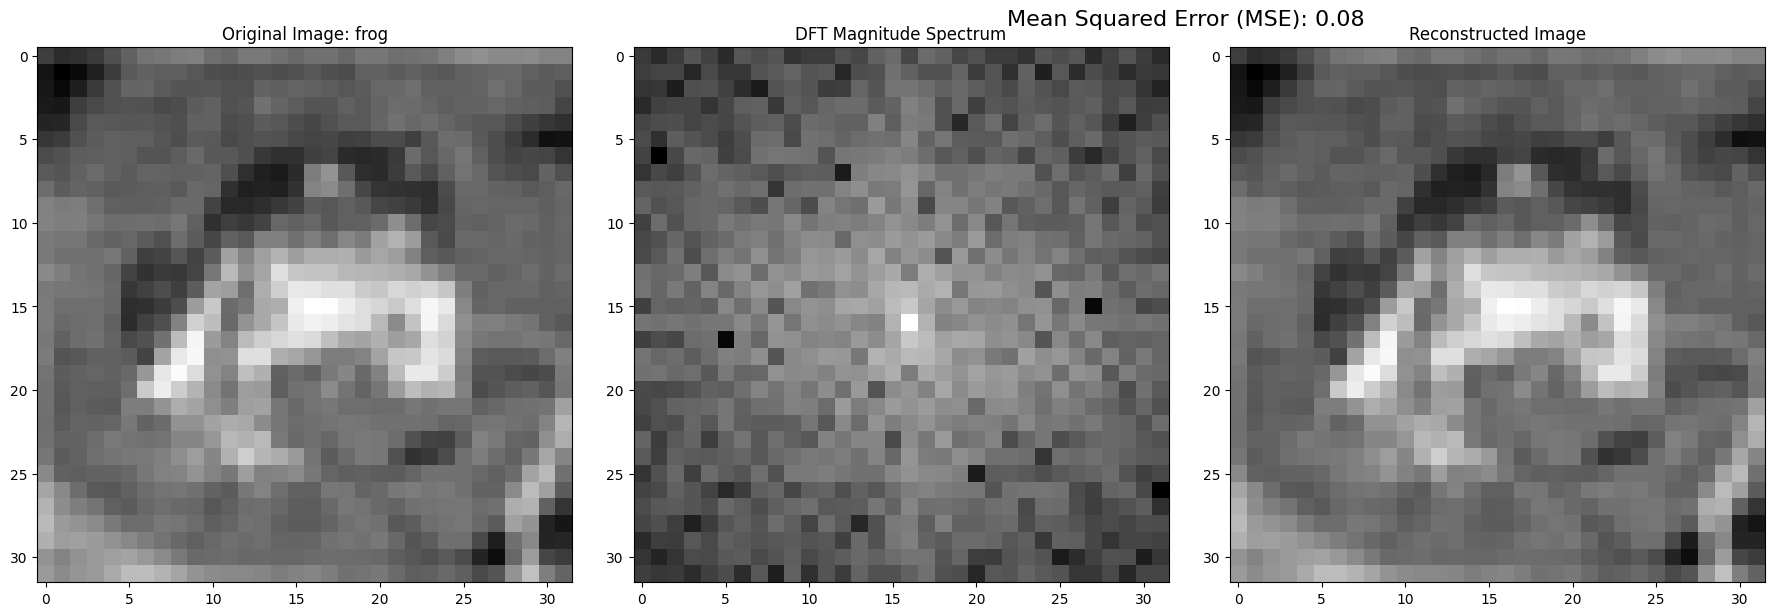

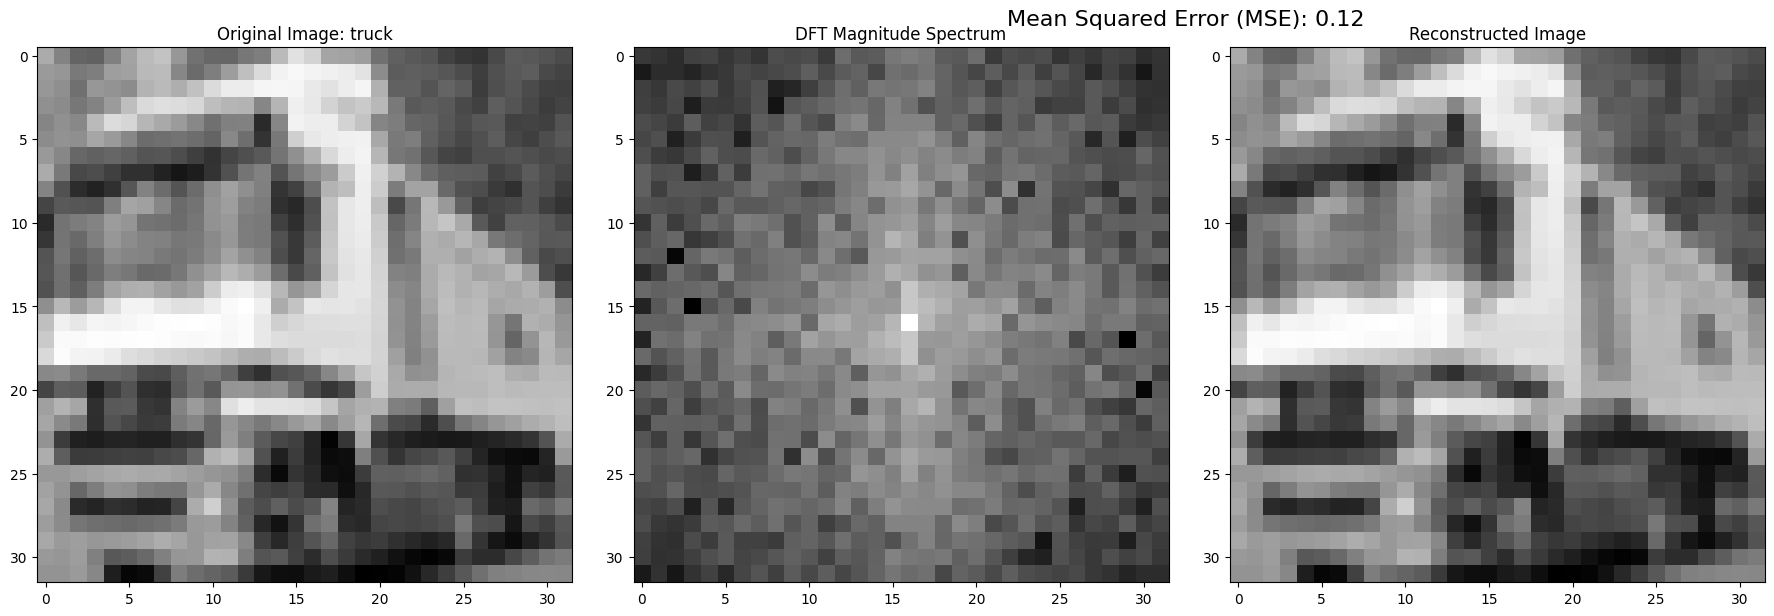

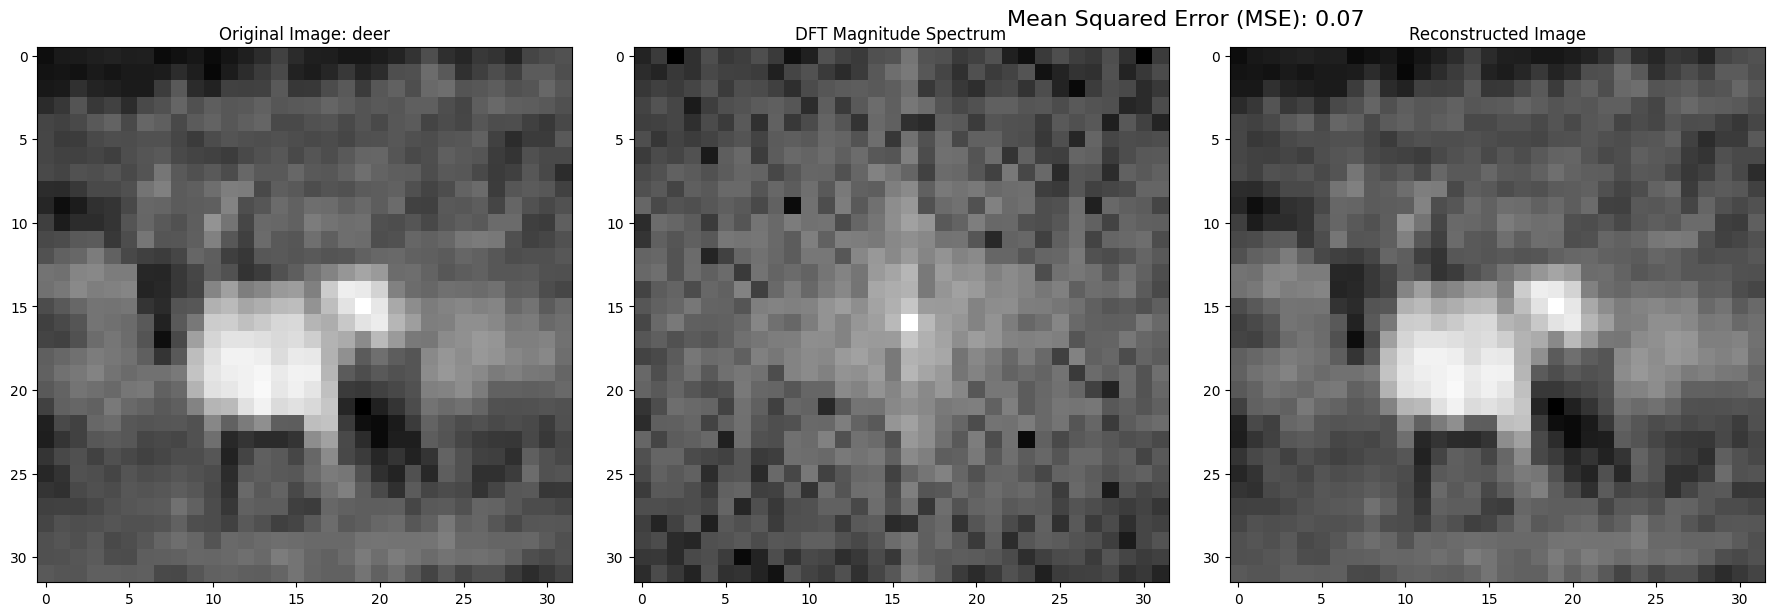

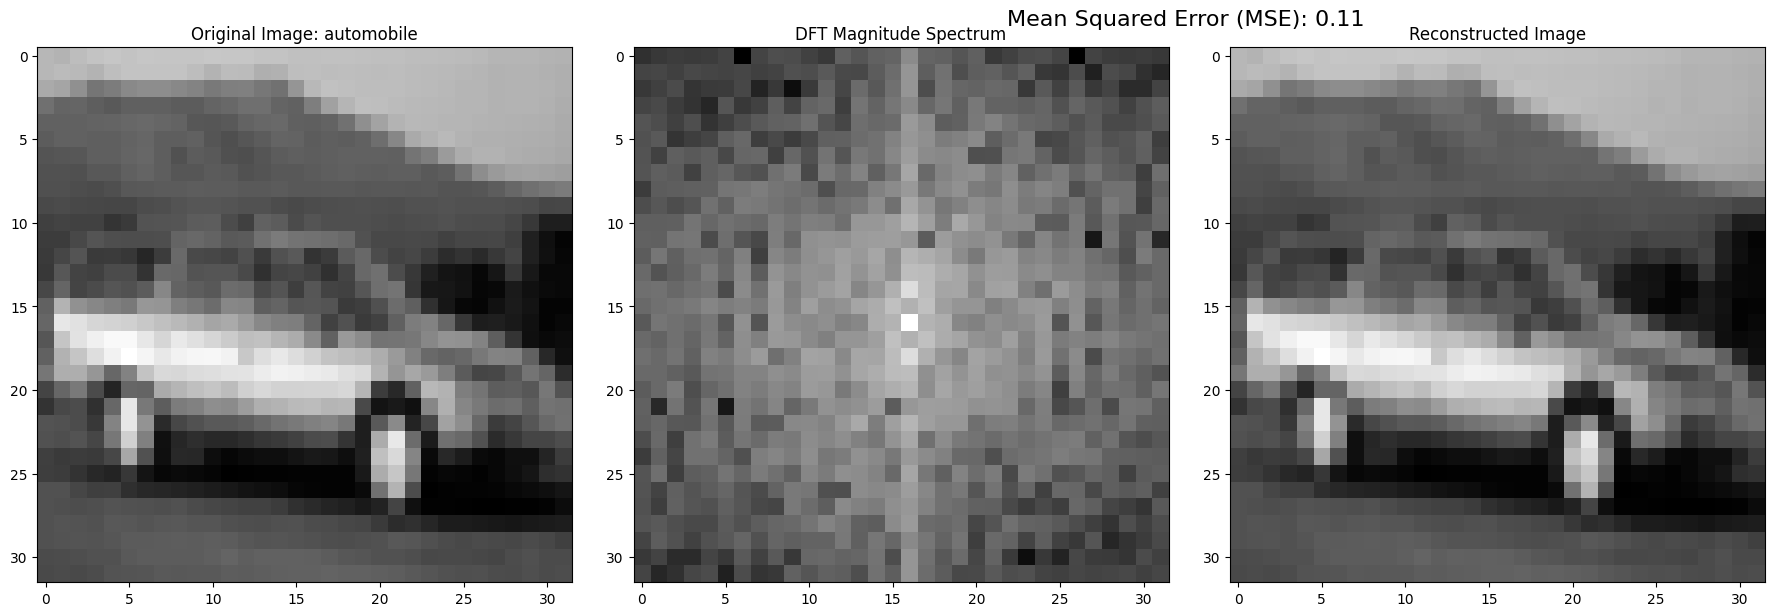

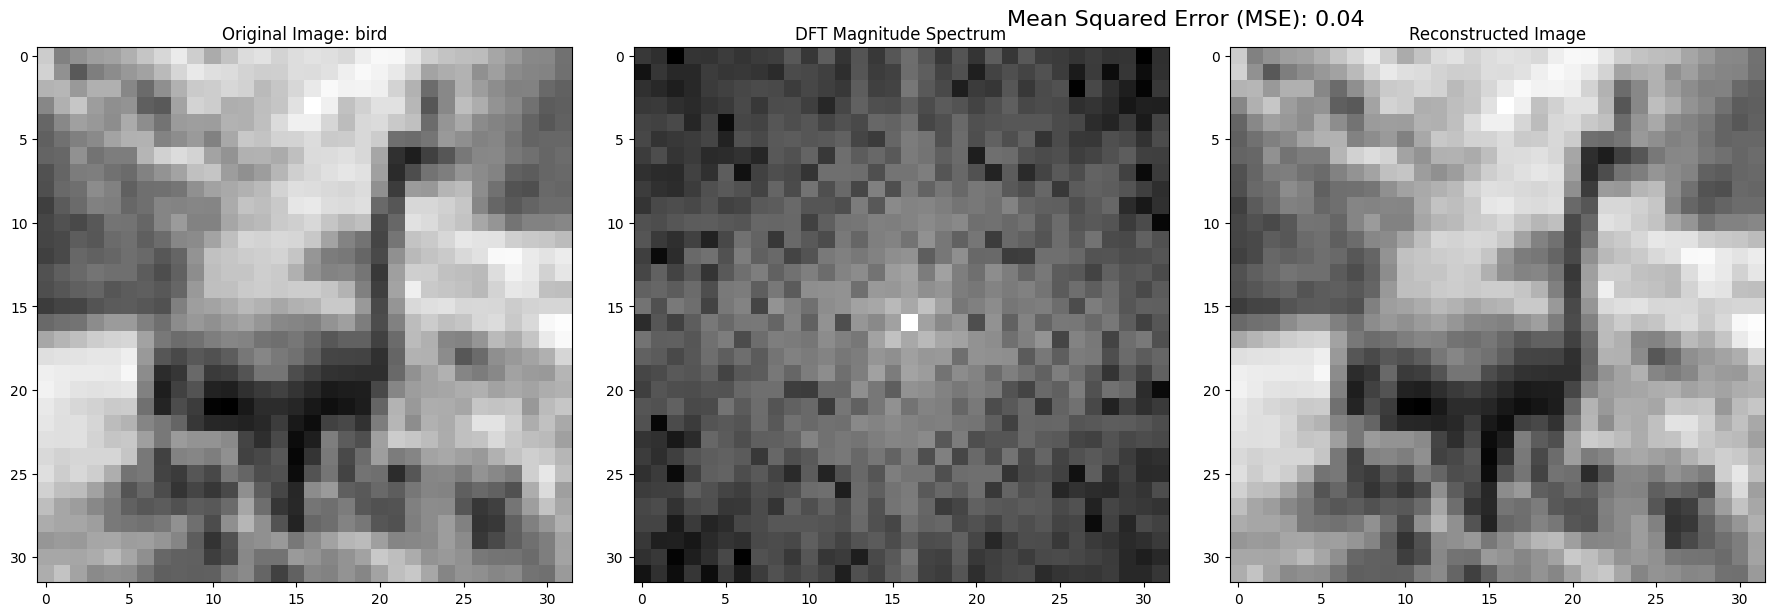

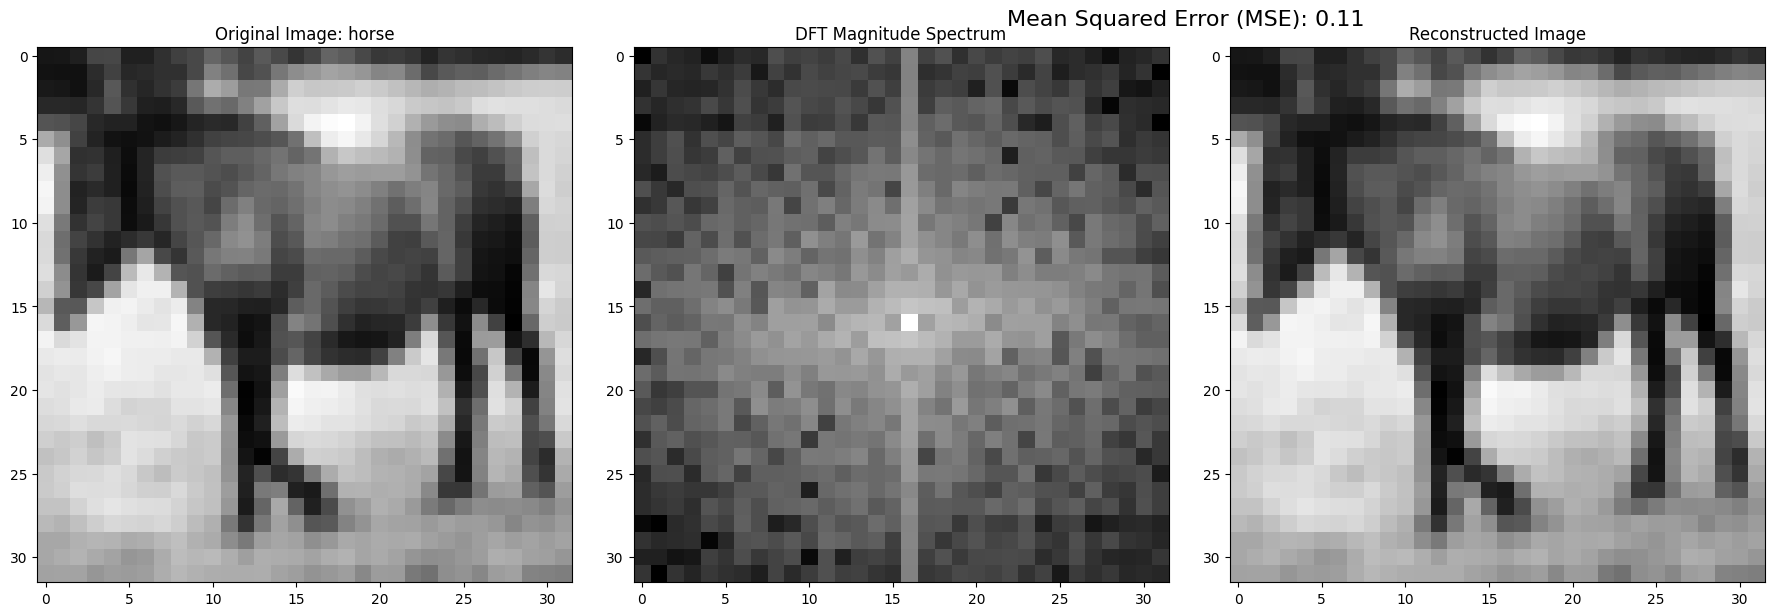

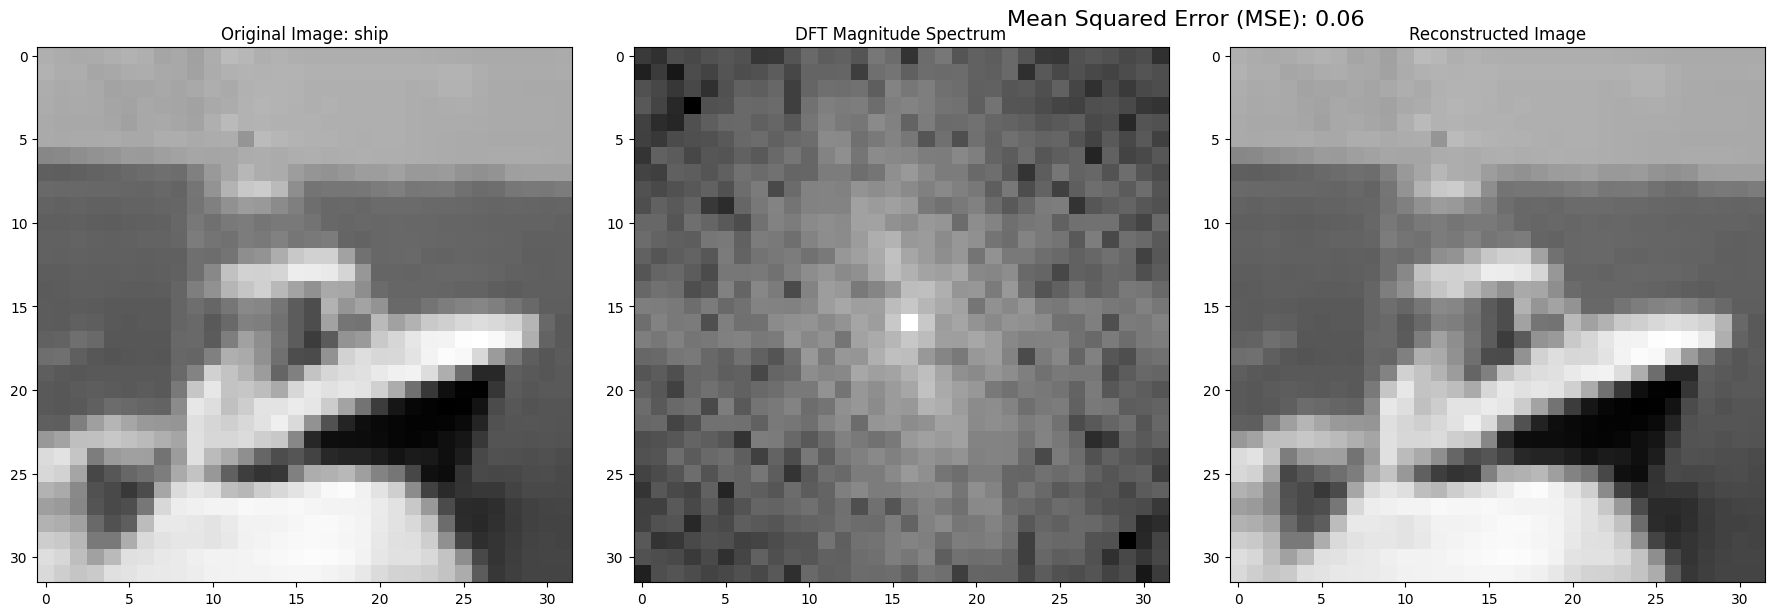

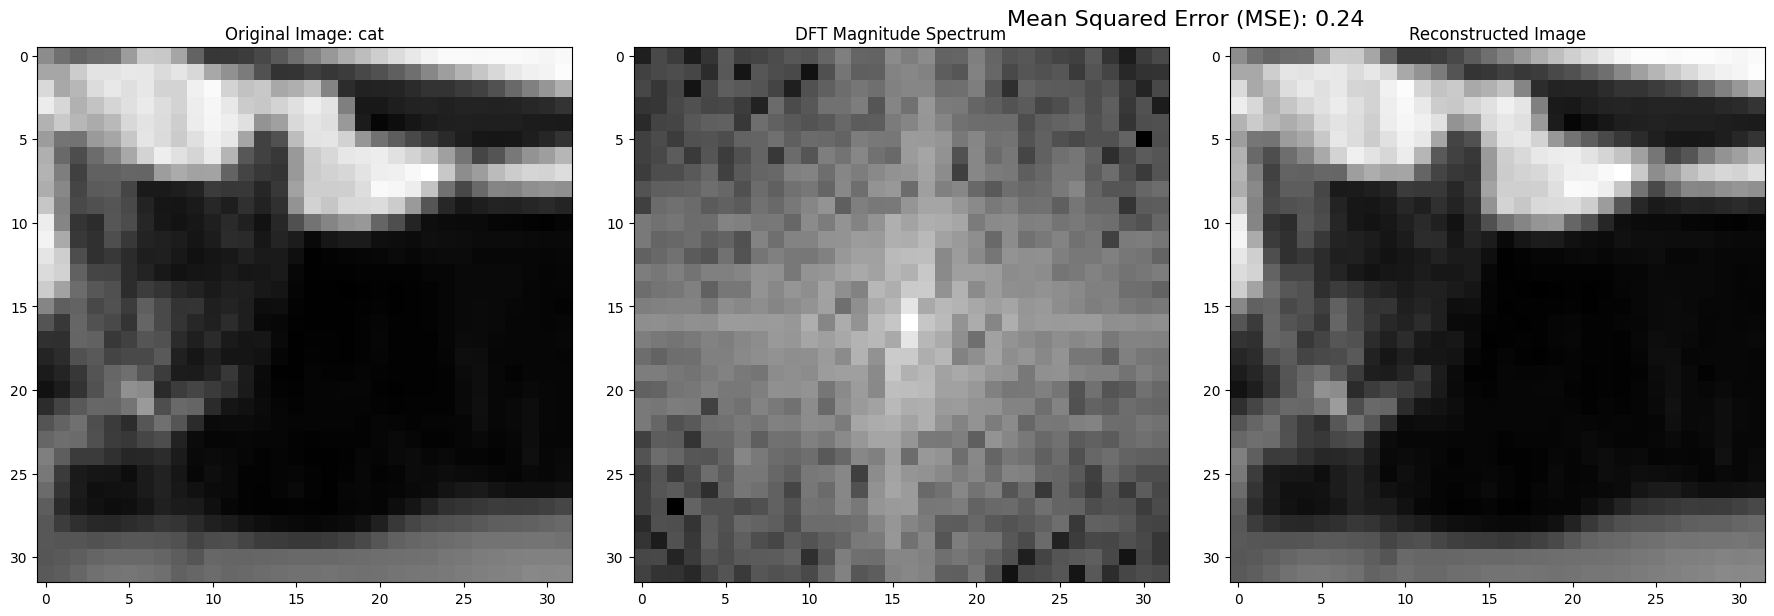

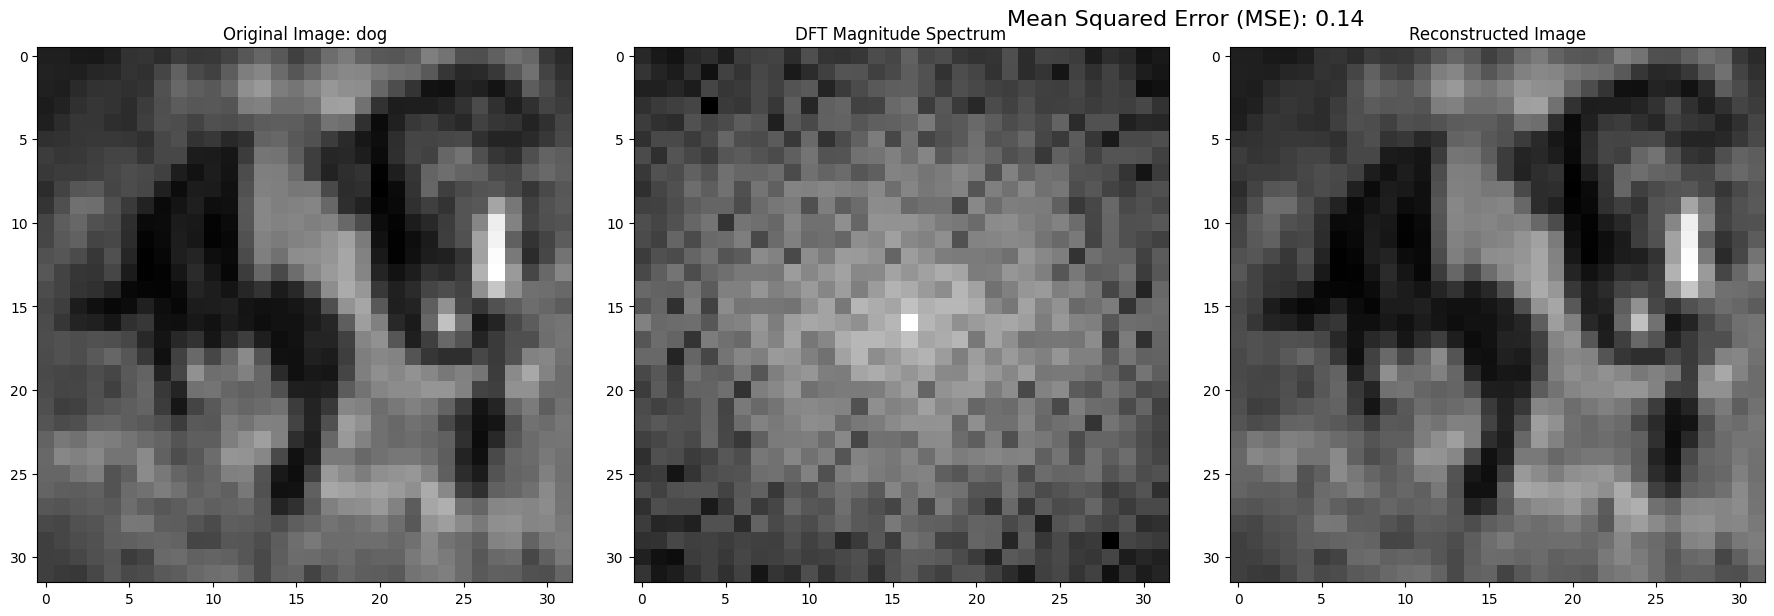

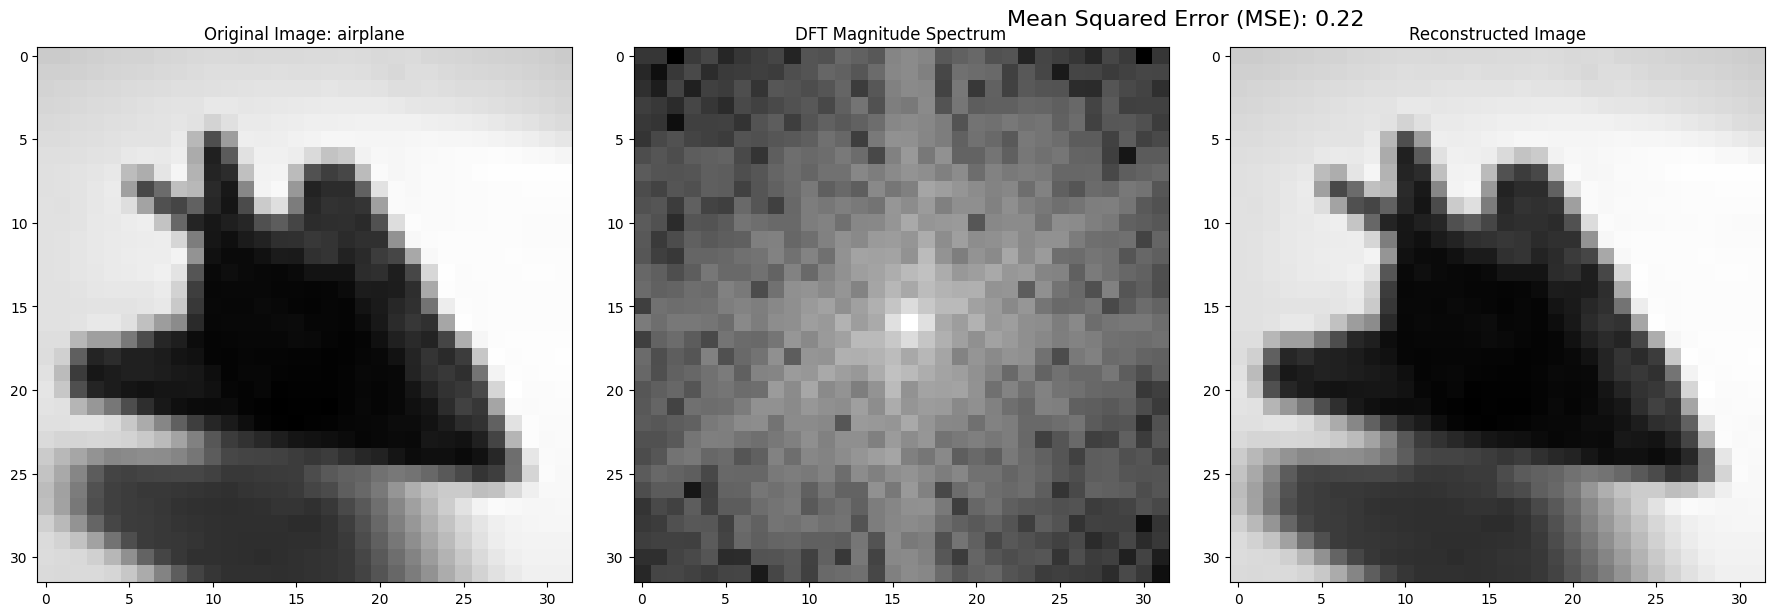

In [11]:
calculate_dft_and_idft(grey_images)
